In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_4_stride_4_2_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_129_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           960       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           14368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              9

Text(0, 0.5, 'Loss')

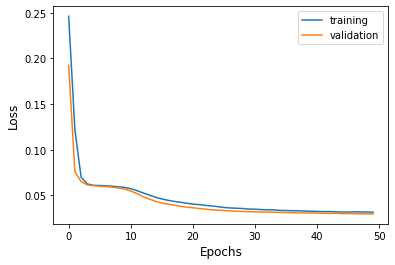

In [80]:
fig, ax = checker.plot_loss()
fig.set_size_inches(6, 4)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [2 0 1]
group_bunches: [ 345. 1355.  233.]
group_bunches sorted: [ 233.  345. 1355.]
restore_index: [1 2 0]
group_bunches restored: [ 345. 1355.  233.]
bunch_sorted_index: [1 0 2]
group_bunches: [ 957.  928. 2743.]
group_bunches sorted: [ 928.  957. 2743.]
restore_index: [1 0 2]
group_bunches restored: [ 957.  928. 2743.]

50/50 [==============================] - 99s 2s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
6264  Inst  7137     1     h  7 2018-09-08 15:14:02   
6094  Inst  7464     1     h  7 2018-11-22 04:41:14   
368   Inst  7475     1     h  7 2018-11-26 17:52:14   
288   Inst  6596     1     h  7 2018-04-23 09:20:14   
3237  Inst  7483     1     h  7 2018-11-29 11:23:14   

                                                   file  n_bunches  \
6264  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7137/...       2555   
6094  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7464/...        460   
368   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7475/...        733   
288   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6596/...        732   
3237  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7483/...        648   

      bunch_index  bunch_number  ts_length  chunk  
6264       1136.0         827.0      65536     24  
6094        413.0          34.0      65536     23  
368        1504.0         315.0      65536      1  
288         195.0         147.0      65536      1  
3237       1310.0         240.0      65536     12

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 8s 2s/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  6629     1     h  7 2018-05-01 16:08:13   
1244  Inst  6633     1     h  7 2018-05-02 06:23:14   
5767  Inst  6919     1     h  7 2018-07-13 16:11:14   
7206  Inst  6731     1     h  7 2018-05-27 20:59:10   
7624  Inst  6629     1     h  7 2018-05-01 16:08:13   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6629/...       1887   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6633/...       1887   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...       2556   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6731/...       1068   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6629/...       1887   

      bunch_index  bunch_number  ts_length  chunk  
4808       3006.0        1667.0      65536     18  
1244       2681.0        1425.0      65536      4  
5767        602.0         425.0      65536     22  
7206       1387.0        1007.0      65536     28  
7624       3006.0        1667.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [114]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal, surround=0, figsize=(6,9))
    plt.show()
    encoded = checker.encode(true_signal)
    print(encoded.sum())
    plt.imshow(encoded, vmax=4.823152)
    plt.xticks([])
    plt.yticks([])
    cbar = plt.colorbar()
    for t in cbar.ax.get_yticklabels():
         t.set_fontsize(20)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

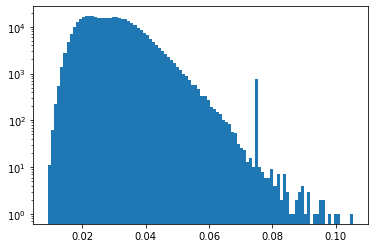

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

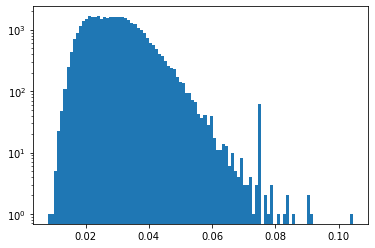

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.02573285694870984
type                                                         Inst
fill                                                         7137
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-08 15:14:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7137/...
n_bunches                                                    2555
bunch_index                                                  1136
bunch_number                                                  827
ts_length                                                   65536
chunk                                                          24
Name: 6264, dtype: object


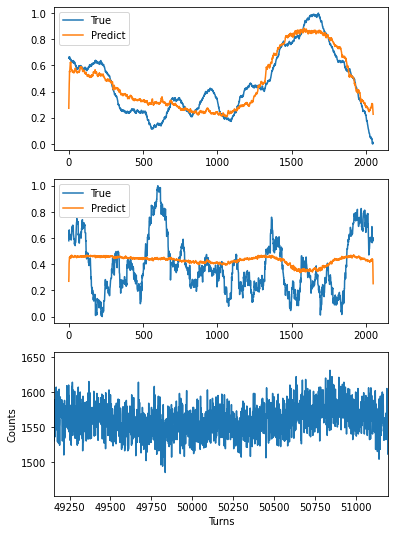

7.3998756


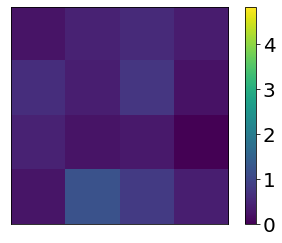

In [115]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 111221
Error: 0.009291571951110555
type                                                         Inst
fill                                                         6276
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 18:22:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6276/...
n_bunches                                                    1868
bunch_index                                                  2125
bunch_number                                                 1133
ts_length                                                   65536
chunk                                                          20
Name: 5244, dtype: object


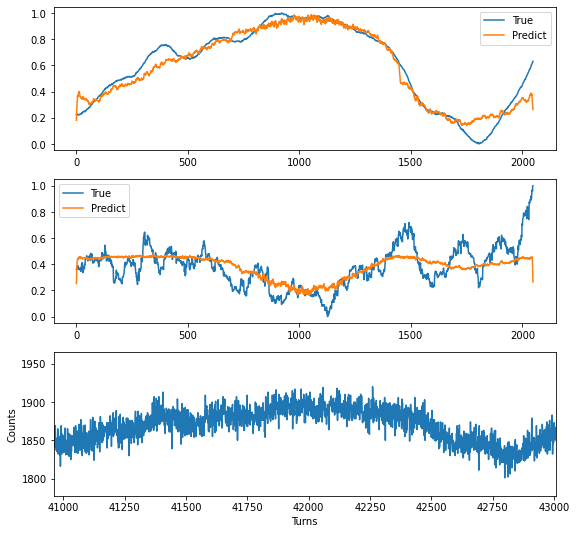

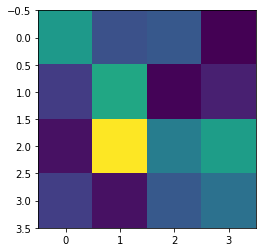

index: 336105
Error: 0.009503950377304832
type                                                         Inst
fill                                                         6966
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-24 02:04:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6966/...
n_bunches                                                    2556
bunch_index                                                  3098
bunch_number                                                 2300
ts_length                                                   65536
chunk                                                          30
Name: 7836, dtype: object


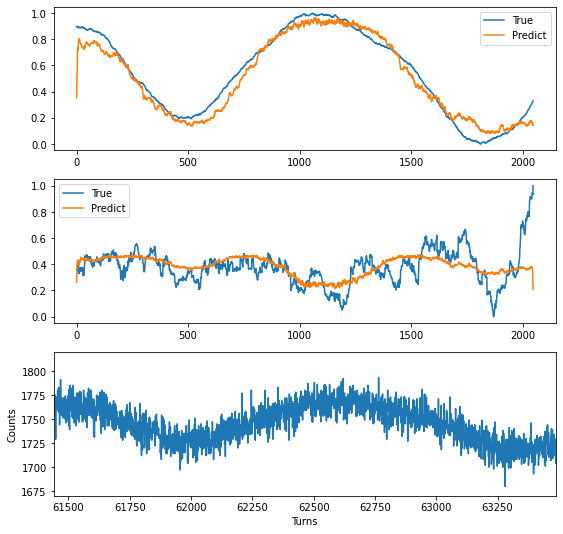

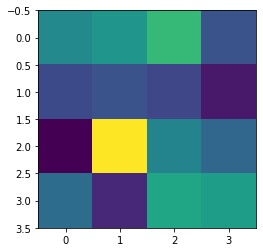

index: 318030
Error: 0.009590907165528979
type                                                         Inst
fill                                                         6343
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 19:00:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6343/...
n_bunches                                                    1868
bunch_index                                                  1948
bunch_number                                                 1037
ts_length                                                   65536
chunk                                                          19
Name: 4873, dtype: object


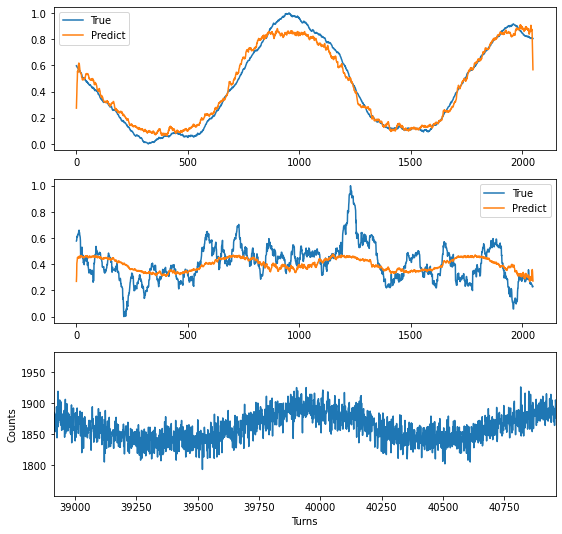

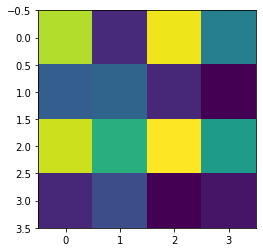

index: 356876
Error: 0.009813021527687968
type                                                         Inst
fill                                                         7468
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-24 02:22:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7468/...
n_bunches                                                     733
bunch_index                                                  1128
bunch_number                                                  234
ts_length                                                   65536
chunk                                                          10
Name: 2648, dtype: object


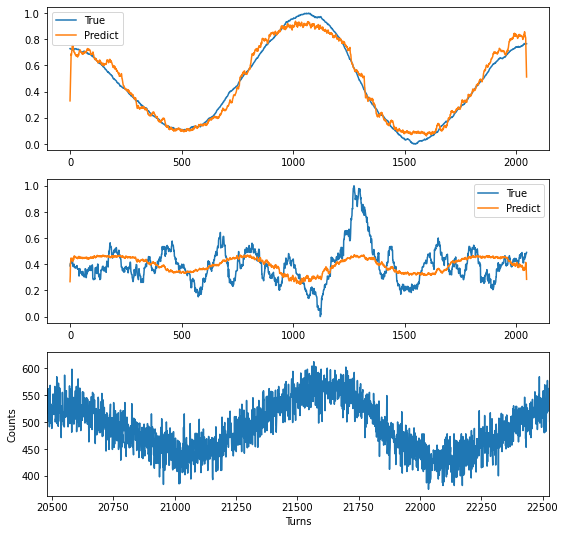

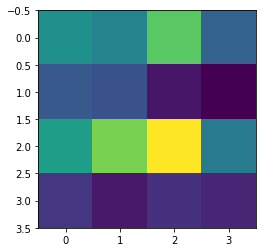

index: 88816
Error: 0.009879919480582998
type                                                         Inst
fill                                                         6696
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-18 10:02:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6696/...
n_bunches                                                    2556
bunch_index                                                  1183
bunch_number                                                  848
ts_length                                                   65536
chunk                                                          28
Name: 7186, dtype: object


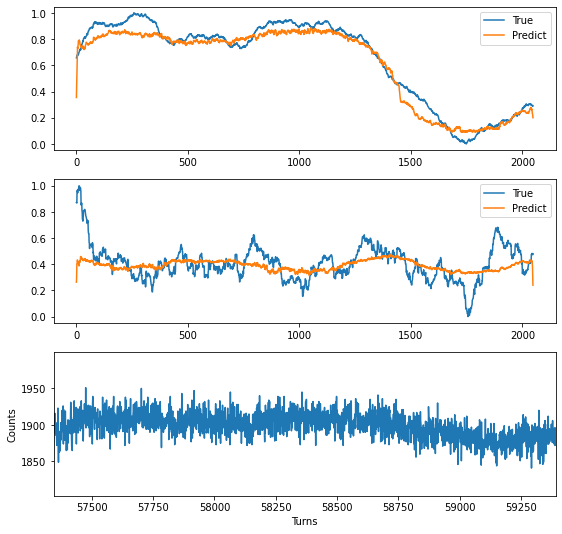

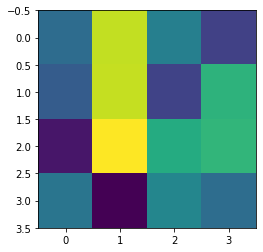

index: 388266
Error: 0.009931136297159877
type                                                         Inst
fill                                                         7481
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-28 12:50:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7481/...
n_bunches                                                     733
bunch_index                                                  1660
bunch_number                                                  354
ts_length                                                   65536
chunk                                                           8
Name: 2135, dtype: object


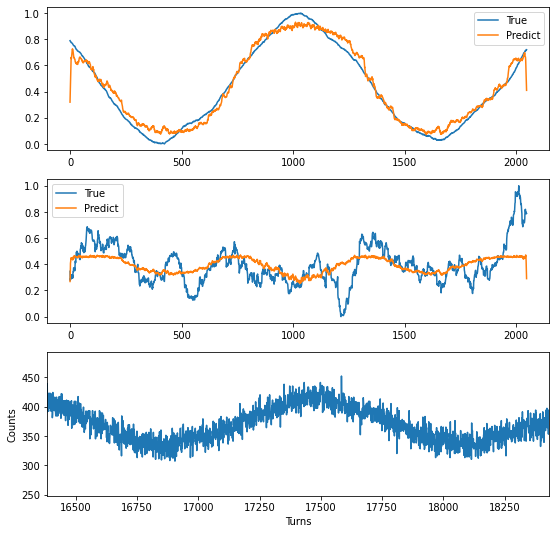

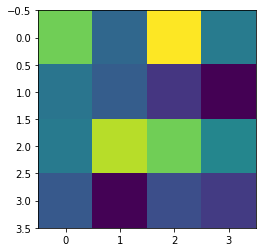

index: 7123
Error: 0.00993444919009713
type                                                         Inst
fill                                                         6344
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 23:51:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6344/...
n_bunches                                                    1868
bunch_index                                                  1080
bunch_number                                                  575
ts_length                                                   65536
chunk                                                           9
Name: 2458, dtype: object


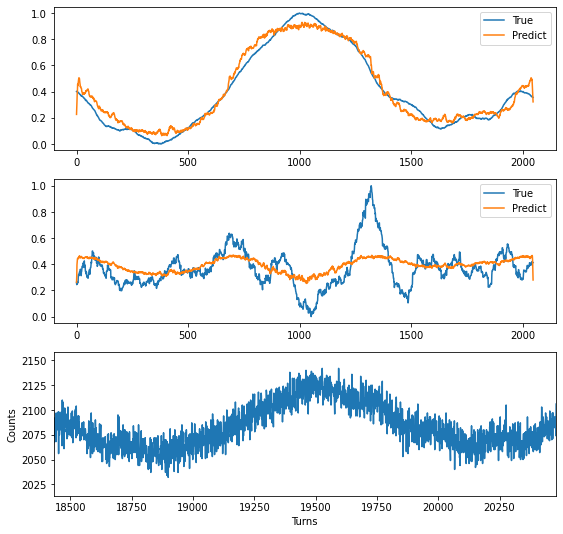

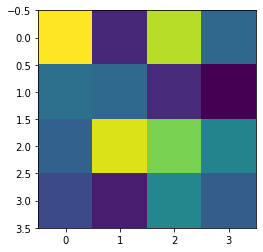

index: 111386
Error: 0.009998378837183356
type                                                         Inst
fill                                                         6356
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-02 04:18:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...
n_bunches                                                    1868
bunch_index                                                     9
bunch_number                                                    9
ts_length                                                   65536
chunk                                                           9
Name: 2375, dtype: object


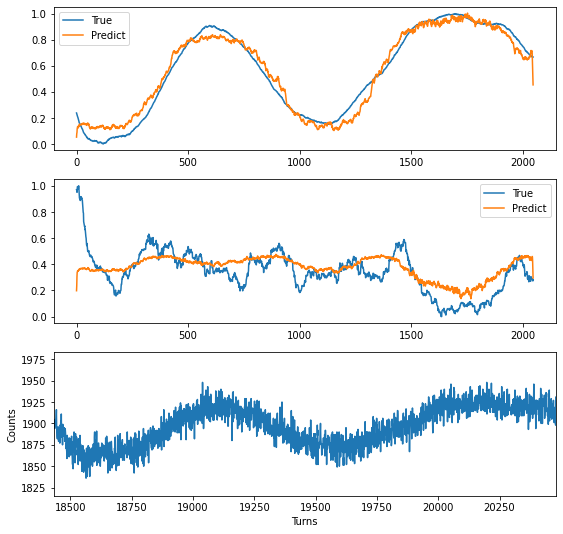

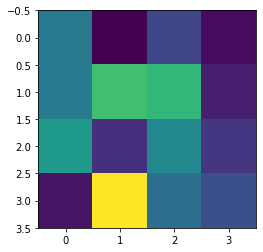

index: 149590
Error: 0.010109107832603992
type                                                         Inst
fill                                                         6436
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 04:36:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...
n_bunches                                                     408
bunch_index                                                  1000
bunch_number                                                   95
ts_length                                                   65536
chunk                                                          17
Name: 4398, dtype: object


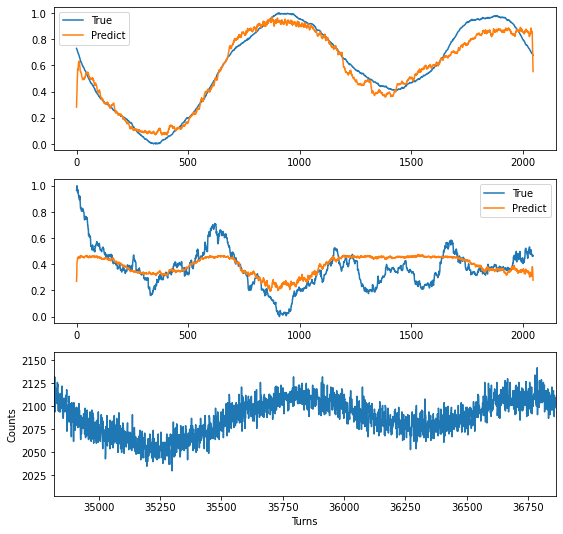

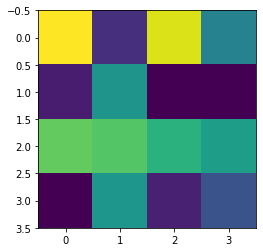

index: 209070
Error: 0.01010932001190901
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 21:02:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                    1836
bunch_index                                                   484
bunch_number                                                  249
ts_length                                                   65536
chunk                                                          19
Name: 5033, dtype: object


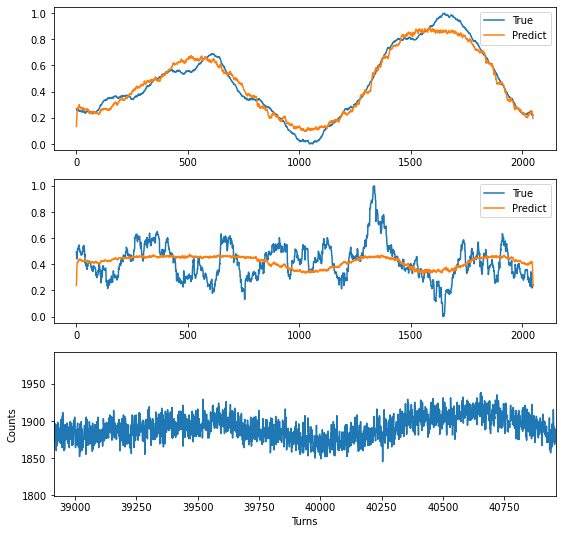

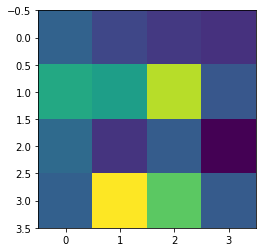

In [70]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 136662
Error: 0.10532660269643421
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          20
Name: 5282, dtype: object


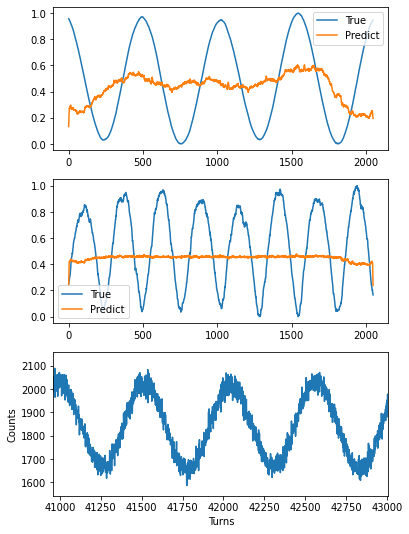

7.1645913


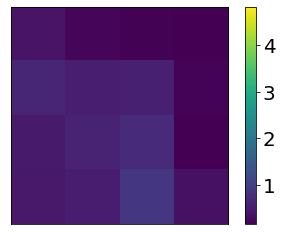

index: 73968
Error: 0.1007896378793177
type                                                         Inst
fill                                                         6436
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 04:40:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...
n_bunches                                                     408
bunch_index                                                   915
bunch_number                                                   40
ts_length                                                   65536
chunk                                                          16
Name: 4205, dtype: object


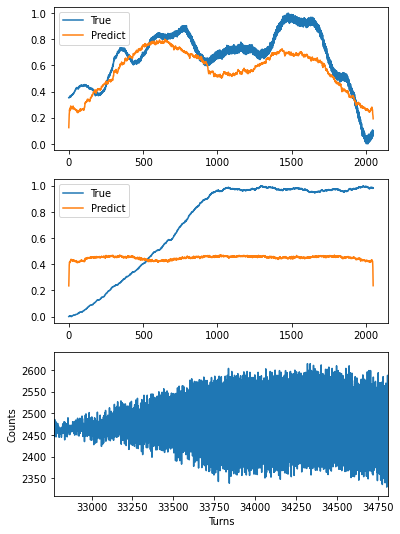

5.5264244


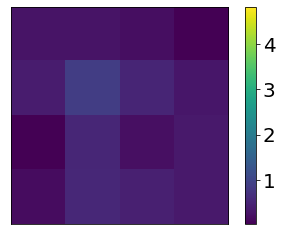

index: 140690
Error: 0.099965178004767
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          14
Name: 3746, dtype: object


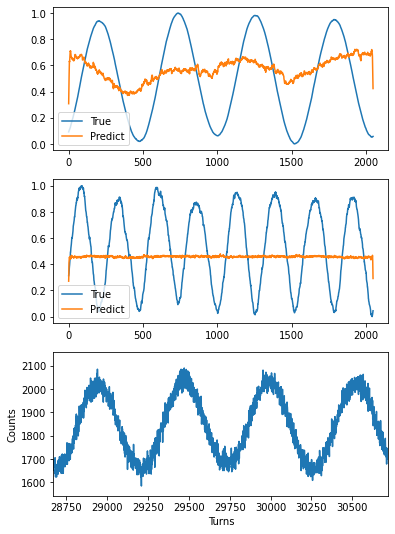

8.255934


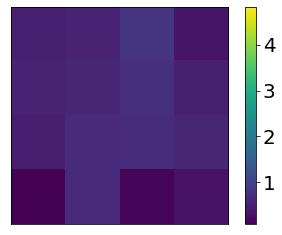

index: 326845
Error: 0.09777883555222663
type                                                         Inst
fill                                                         7419
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-07 12:14:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7419/...
n_bunches                                                      20
bunch_index                                                  2804
bunch_number                                                   17
ts_length                                                   65536
chunk                                                          12
Name: 3231, dtype: object


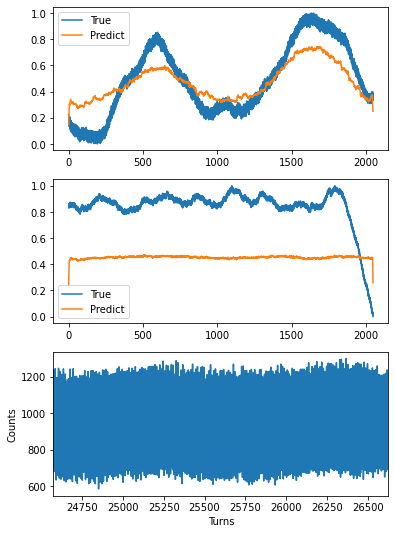

4.6957955


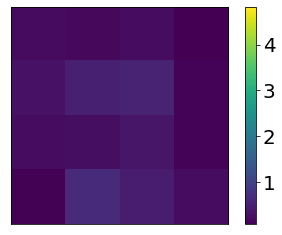

index: 141945
Error: 0.09646253054891649
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          25
Name: 6562, dtype: object


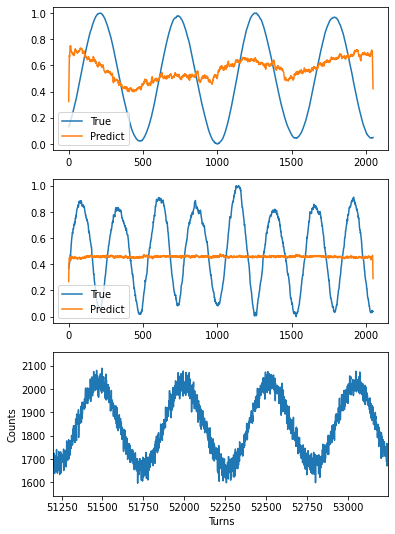

8.535985


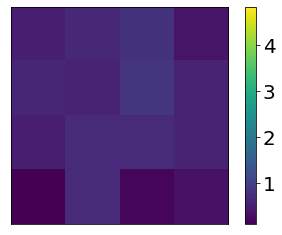

index: 342617
Error: 0.09595001990747772
type                                                         Inst
fill                                                         7182
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-15 17:37:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7182/...
n_bunches                                                     108
bunch_index                                                   101
bunch_number                                                   52
ts_length                                                   65536
chunk                                                           3
Name: 892, dtype: object


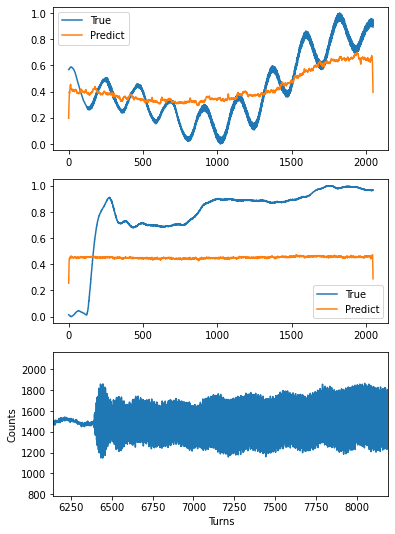

3.989945


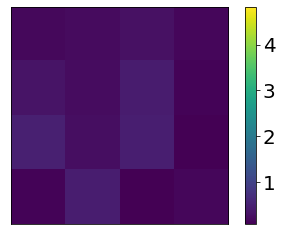

index: 222047
Error: 0.09507506183667393
type                                                         Inst
fill                                                         6912
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-11 23:23:47
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6912/...
n_bunches                                                     780
bunch_index                                                   845
bunch_number                                                  612
ts_length                                                   65536
chunk                                                          11
Name: 2843, dtype: object


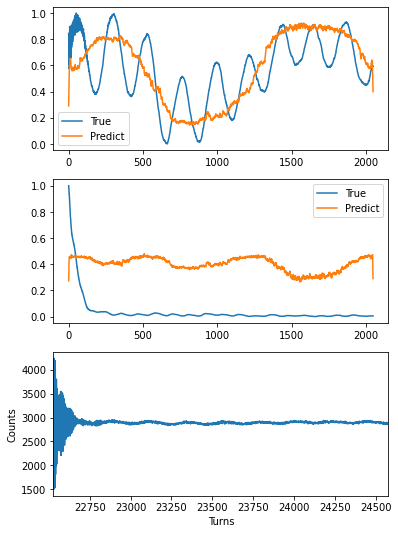

9.160478


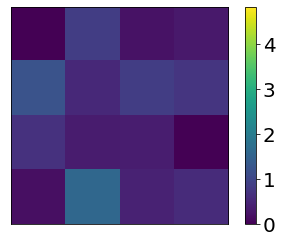

index: 208166
Error: 0.09489326915930907
type                                                         Inst
fill                                                         6356
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-01 22:31:57
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...
n_bunches                                                     428
bunch_index                                                   733
bunch_number                                                  400
ts_length                                                   65536
chunk                                                           6
Name: 1768, dtype: object


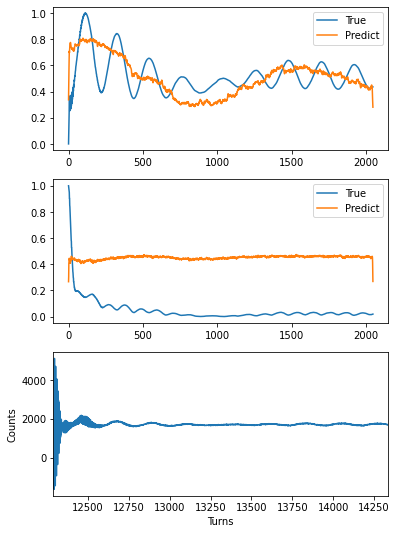

5.165611


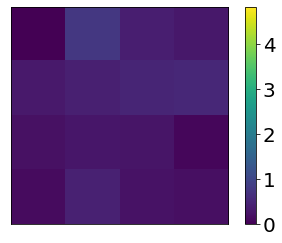

index: 65929
Error: 0.09468993193839412
type                                                         Inst
fill                                                         6731
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-27 20:52:03
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6731/...
n_bunches                                                     252
bunch_index                                                   107
bunch_number                                                   39
ts_length                                                   65536
chunk                                                          12
Name: 3097, dtype: object


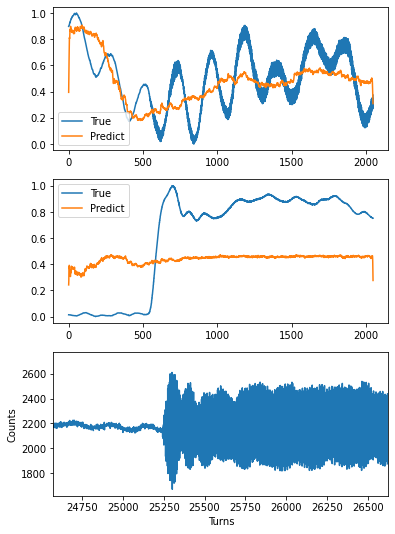

5.9394884


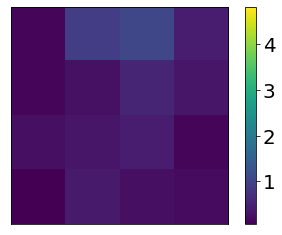

index: 139055
Error: 0.09362016001215259
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          26
Name: 6818, dtype: object


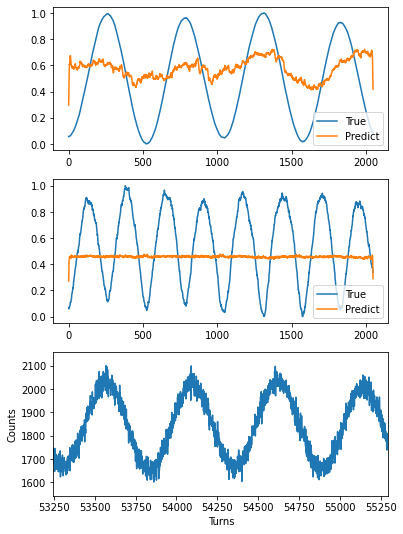

8.324322


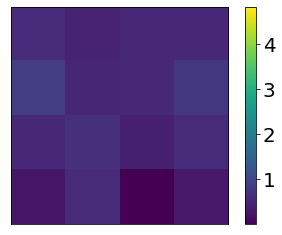

index: 139097
Error: 0.09185089700487585
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                           9
Name: 2466, dtype: object


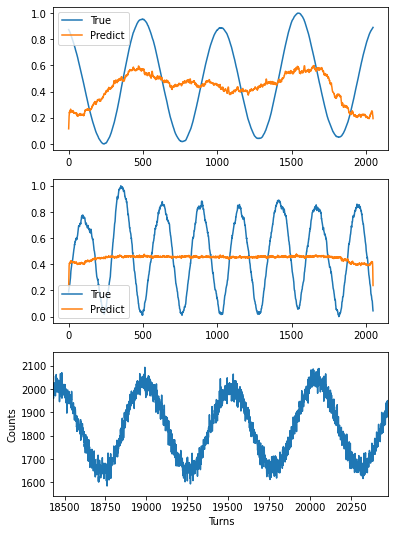

7.2527065


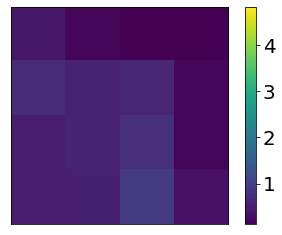

index: 183212
Error: 0.09117444669773278
type                                                         Inst
fill                                                         7361
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 15:03:03
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7361/...
n_bunches                                                     180
bunch_index                                                  1753
bunch_number                                                  146
ts_length                                                   65536
chunk                                                           7
Name: 2001, dtype: object


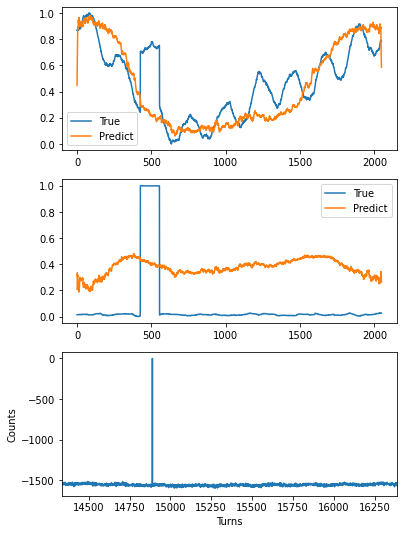

10.091669


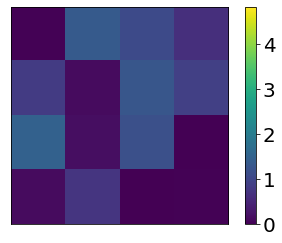

index: 184139
Error: 0.091163957563249
type                                                         Inst
fill                                                         6693
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 20:07:53
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6693/...
n_bunches                                                     156
bunch_index                                                    89
bunch_number                                                   41
ts_length                                                   65536
chunk                                                           1
Name: 498, dtype: object


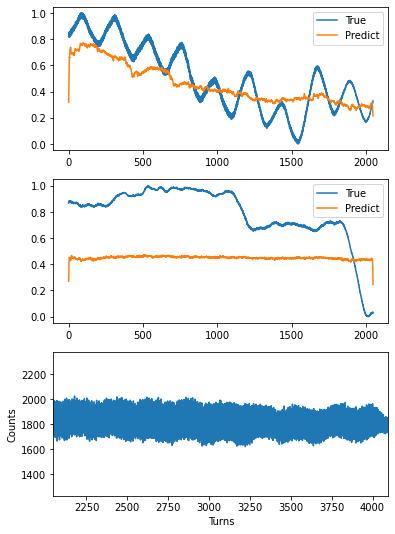

4.6777606


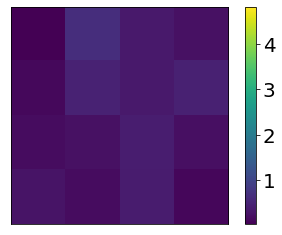

index: 137887
Error: 0.09042944770893123
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          13
Name: 3490, dtype: object


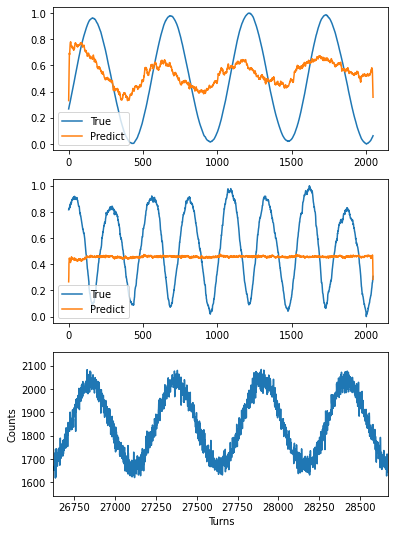

8.192963


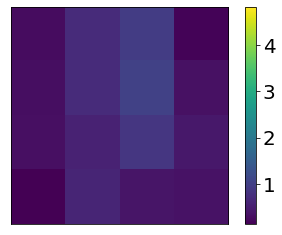

index: 139317
Error: 0.08969211400613246
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          24
Name: 6306, dtype: object


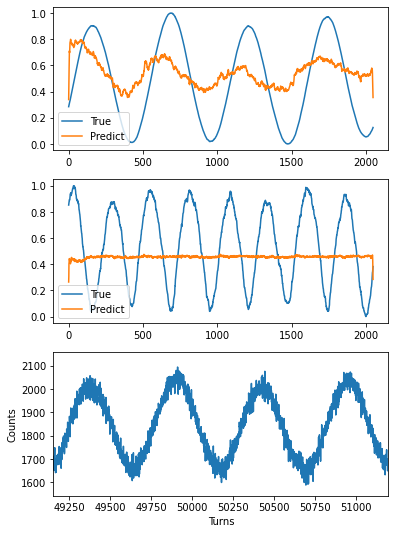

8.222527


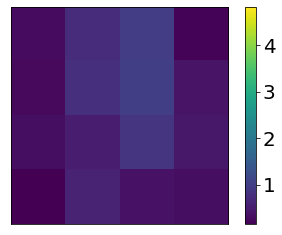

index: 72902
Error: 0.08930321723284372
type                                                         Inst
fill                                                         6436
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 04:40:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...
n_bunches                                                     408
bunch_index                                                   915
bunch_number                                                   40
ts_length                                                   65536
chunk                                                          20
Name: 5229, dtype: object


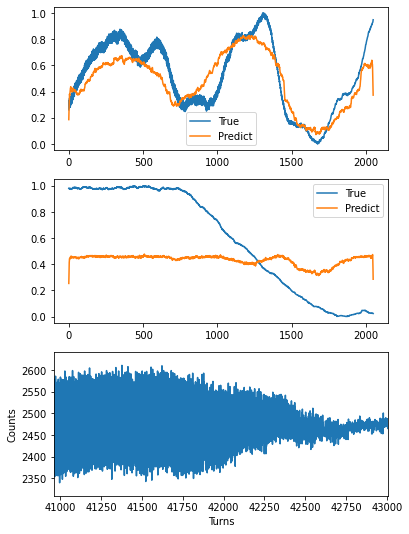

6.5042267


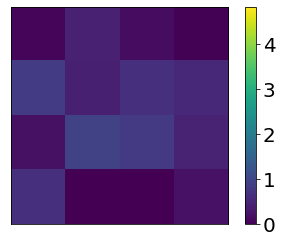

index: 341692
Error: 0.08922499221969002
type                                                         Inst
fill                                                         6674
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-12 03:48:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6674/...
n_bunches                                                     252
bunch_index                                                   151
bunch_number                                                   76
ts_length                                                   65536
chunk                                                          10
Name: 2766, dtype: object


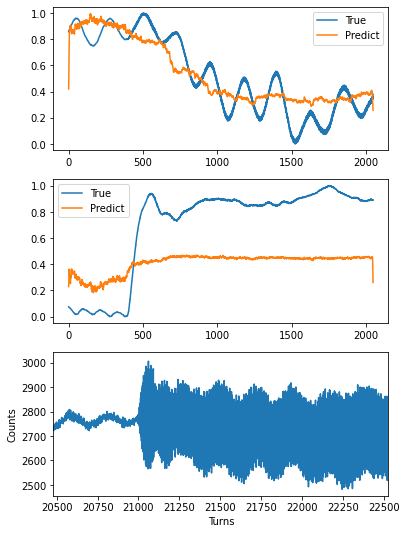

7.2173367


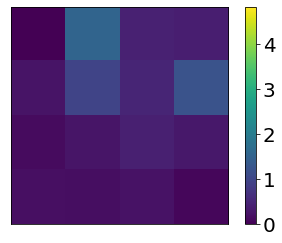

index: 139140
Error: 0.08902386272860333
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          19
Name: 5026, dtype: object


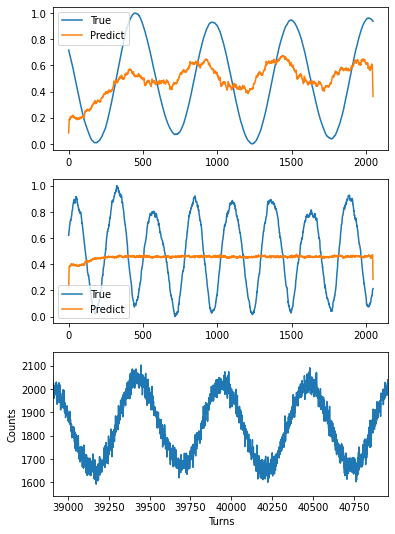

4.1296406


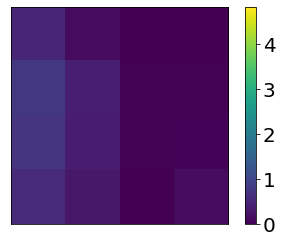

index: 140874
Error: 0.08857450173364542
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          27
Name: 7074, dtype: object


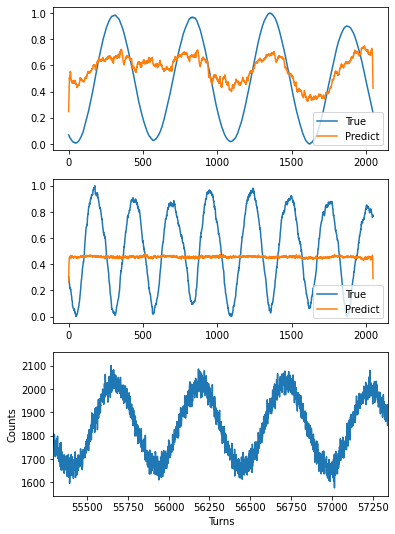

8.847479


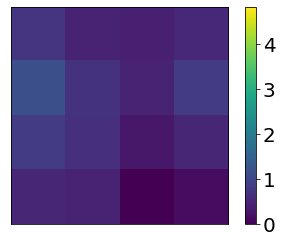

index: 137781
Error: 0.08811758905815228
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          16
Name: 4258, dtype: object


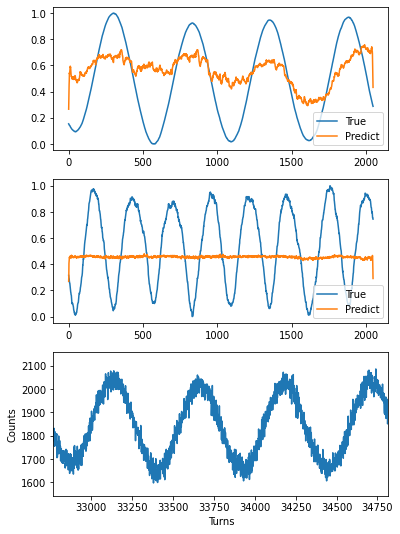

8.5343895


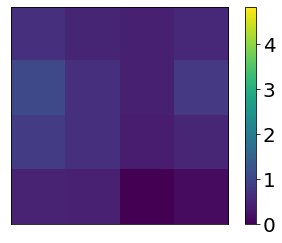

index: 94022
Error: 0.08805890768262051
type                                                         Inst
fill                                                         7319
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-19 13:49:18
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7319/...
n_bunches                                                     252
bunch_index                                                   238
bunch_number                                                  151
ts_length                                                   65536
chunk                                                          11
Name: 2992, dtype: object


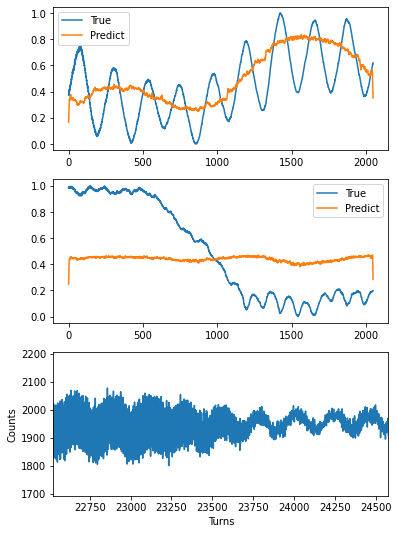

5.9996233


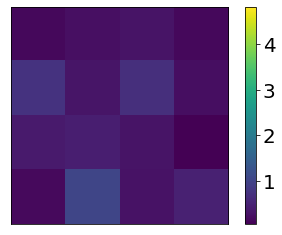

index: 154773
Error: 0.08779579157088693
type                                                         Inst
fill                                                         6757
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-04 04:15:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6757/...
n_bunches                                                     252
bunch_index                                                   153
bunch_number                                                   78
ts_length                                                   65536
chunk                                                           8
Name: 2250, dtype: object


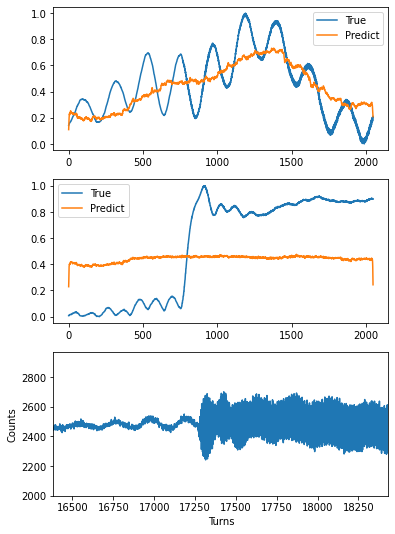

4.424362


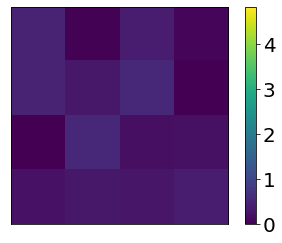

index: 301903
Error: 0.08726993701507717
type                                                         Inst
fill                                                         6640
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-04 08:55:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6640/...
n_bunches                                                     300
bunch_index                                                   277
bunch_number                                                  177
ts_length                                                   65536
chunk                                                          11
Name: 2992, dtype: object


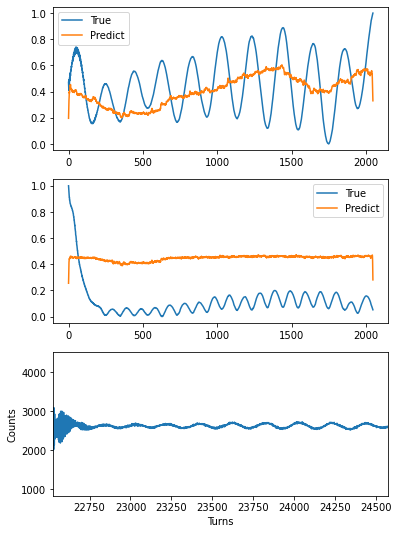

4.126831


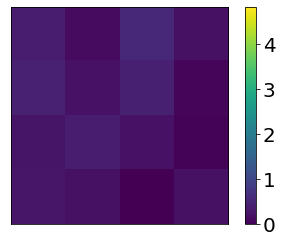

index: 157594
Error: 0.08677810033370029
type                                                         Inst
fill                                                         6805
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-16 02:04:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6805/...
n_bunches                                                     588
bunch_index                                                  2627
bunch_number                                                  558
ts_length                                                   65536
chunk                                                           9
Name: 2449, dtype: object


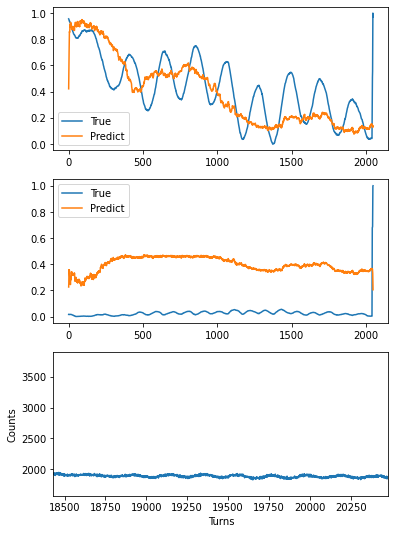

8.226313


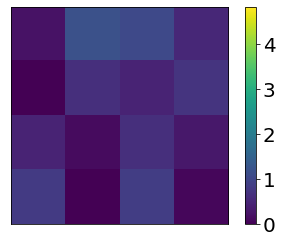

index: 174163
Error: 0.08535105255768724
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:08:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     300
bunch_index                                                   376
bunch_number                                                  192
ts_length                                                   65536
chunk                                                           6
Name: 1769, dtype: object


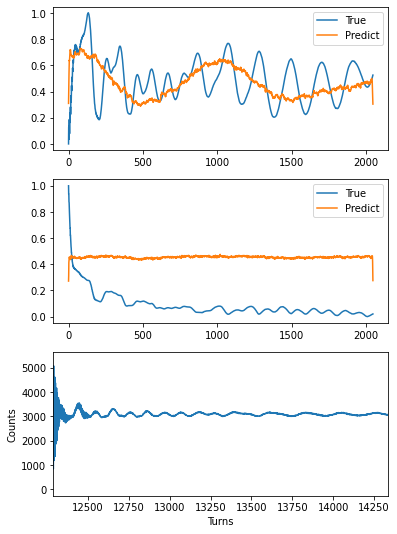

4.5411897


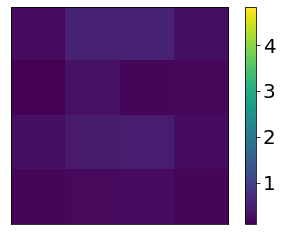

index: 135013
Error: 0.08511396908159846
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                           3
Name: 930, dtype: object


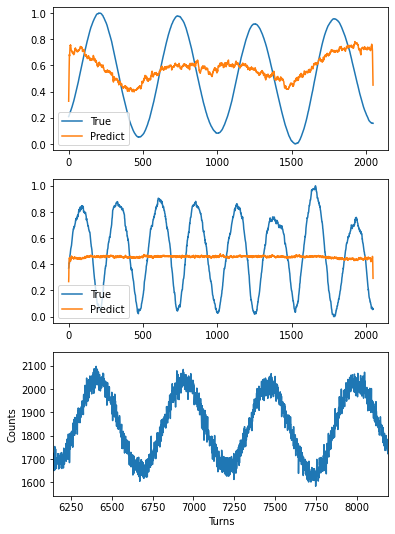

8.433634


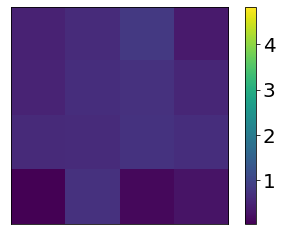

index: 154841
Error: 0.08479897164021166
type                                                         Inst
fill                                                         6757
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-04 04:15:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6757/...
n_bunches                                                     252
bunch_index                                                   153
bunch_number                                                   78
ts_length                                                   65536
chunk                                                          15
Name: 4042, dtype: object


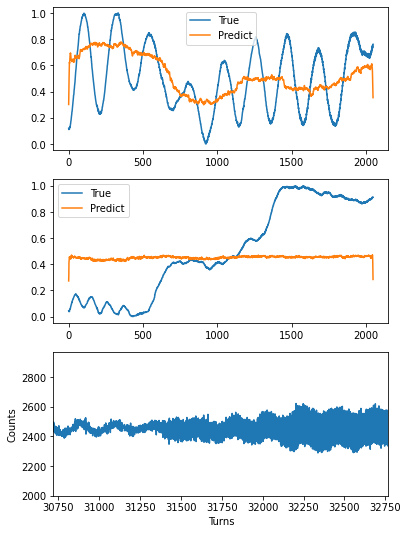

5.2003837


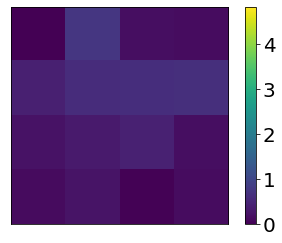

index: 136146
Error: 0.08421019669529307
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                           7
Name: 1954, dtype: object


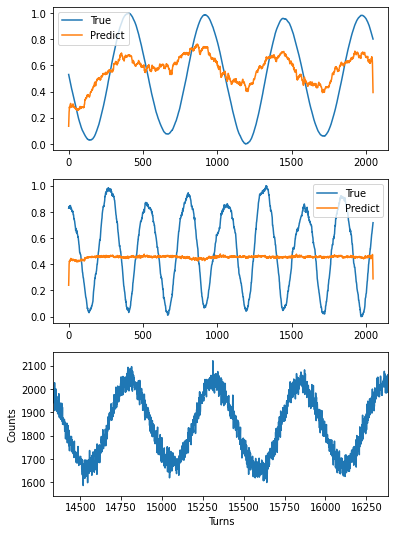

5.6324186


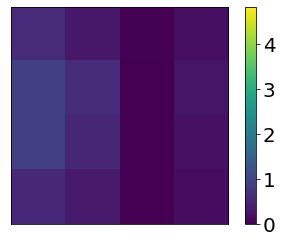

index: 137361
Error: 0.08416017656992233
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          15
Name: 4002, dtype: object


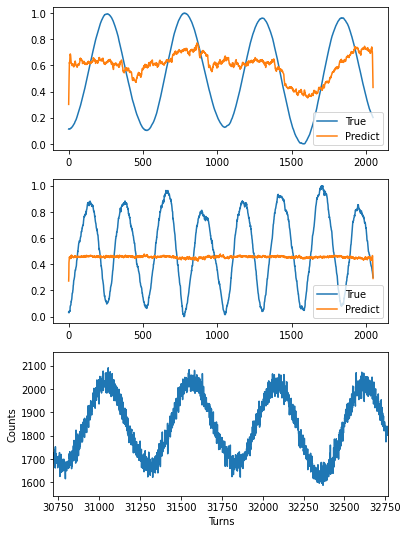

8.42704


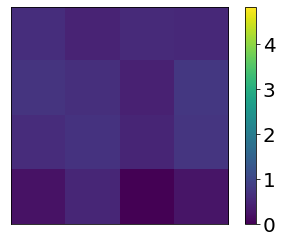

index: 190629
Error: 0.0841149464874395
type                                                         Inst
fill                                                         7048
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-13 04:35:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7048/...
n_bunches                                                     252
bunch_index                                                    76
bunch_number                                                   27
ts_length                                                   65536
chunk                                                          22
Name: 5833, dtype: object


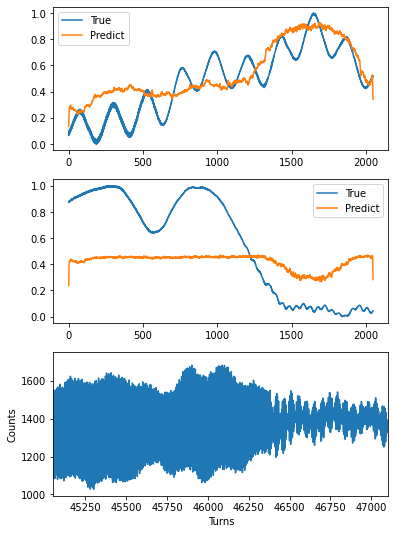

7.099595


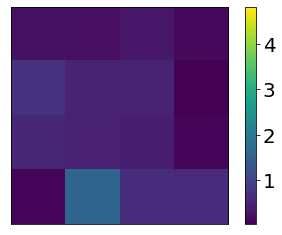

index: 139339
Error: 0.08407724537266754
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          30
Name: 7842, dtype: object


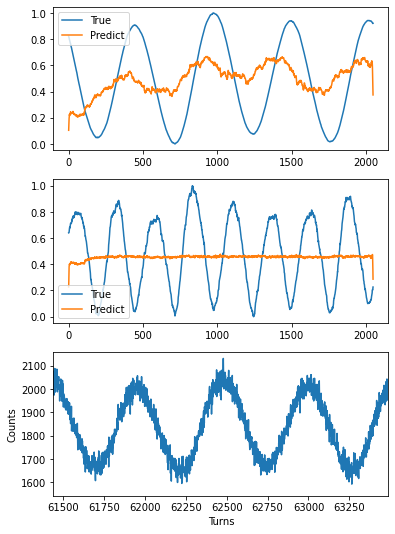

4.272436


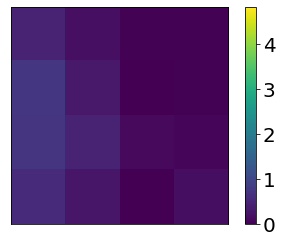

index: 167125
Error: 0.08371111852893892
type                                                         Inst
fill                                                         6940
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-18 04:51:11
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6940/...
n_bunches                                                     108
bunch_index                                                    75
bunch_number                                                   26
ts_length                                                   65536
chunk                                                          10
Name: 2773, dtype: object


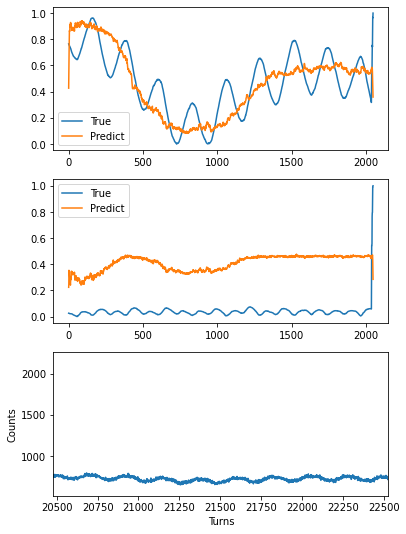

8.289919


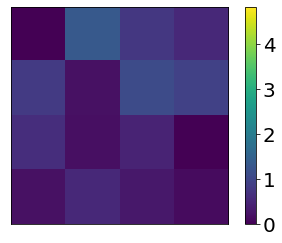

index: 137555
Error: 0.08354680727888764
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                           4
Name: 1186, dtype: object


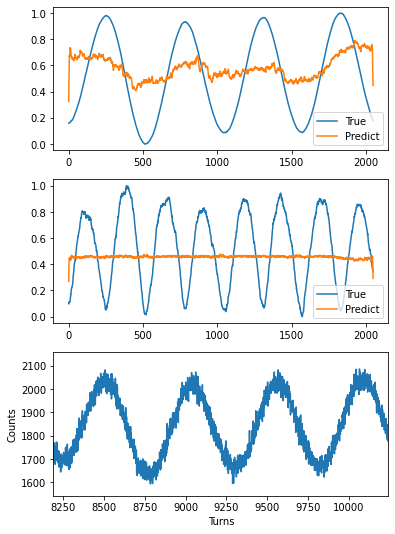

8.191949


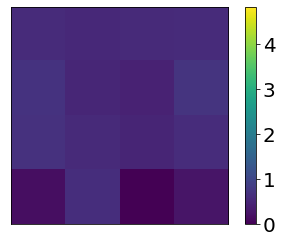

index: 301393
Error: 0.08352534286984248
type                                                         Inst
fill                                                         7114
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-01 21:32:06
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7114/...
n_bunches                                                    1212
bunch_index                                                  1435
bunch_number                                                 1067
ts_length                                                   65536
chunk                                                          12
Name: 3132, dtype: object


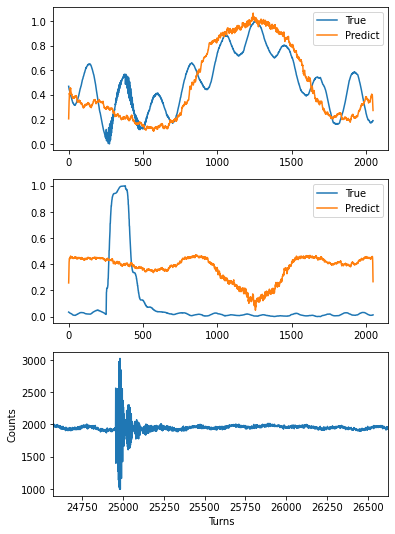

9.960876


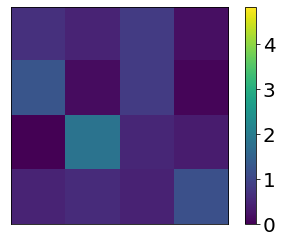

index: 109055
Error: 0.0834646158872769
type                                                         Inst
fill                                                         6215
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-16 23:19:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6215/...
n_bunches                                                     108
bunch_index                                                   153
bunch_number                                                  103
ts_length                                                   65536
chunk                                                           5
Name: 1529, dtype: object


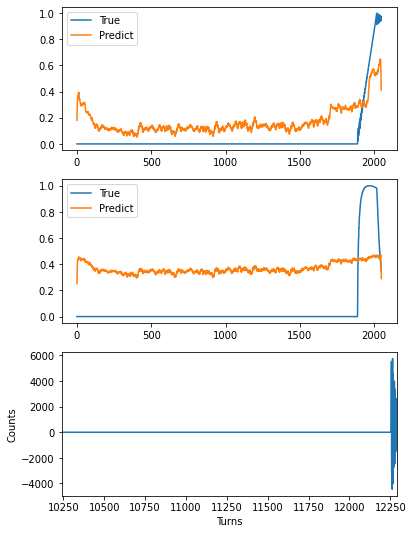

10.758536


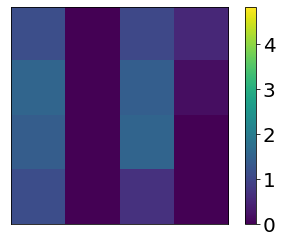

index: 141686
Error: 0.0829176583923122
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                           8
Name: 2210, dtype: object


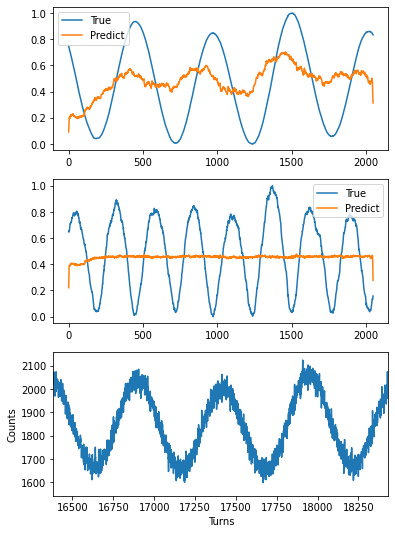

4.3090773


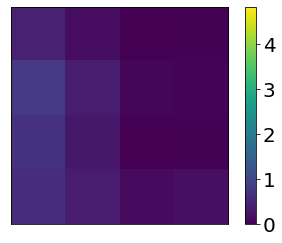

index: 140909
Error: 0.08262365626506595
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          21
Name: 5538, dtype: object


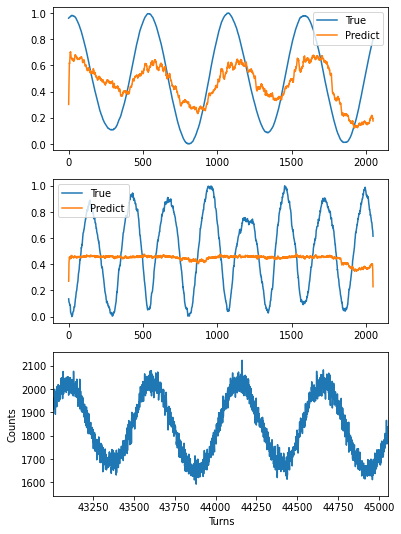

11.264095


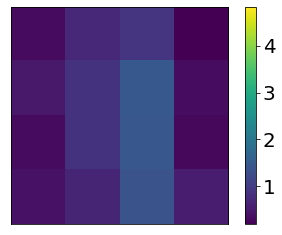

index: 37750
Error: 0.08227452141850665
type                                                         Inst
fill                                                         6397
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-18 13:05:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6397/...
n_bunches                                                    1036
bunch_index                                                  2143
bunch_number                                                  924
ts_length                                                   65536
chunk                                                           3
Name: 801, dtype: object


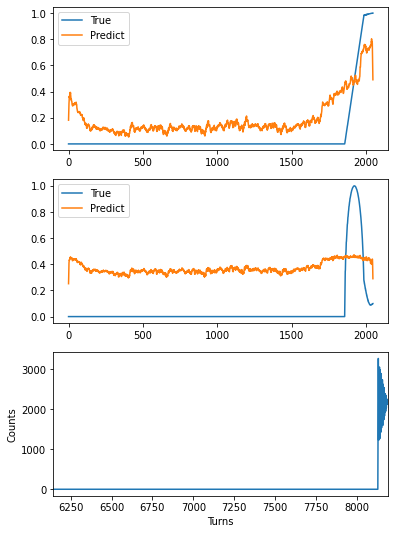

10.667225


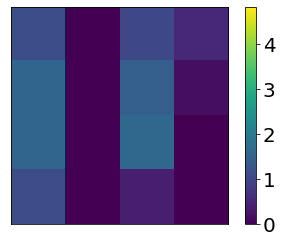

index: 252831
Error: 0.08200954865704835
type                                                         Inst
fill                                                         6274
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 18:44:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6274/...
n_bunches                                                     172
bunch_index                                                   273
bunch_number                                                  140
ts_length                                                   65536
chunk                                                           6
Name: 1544, dtype: object


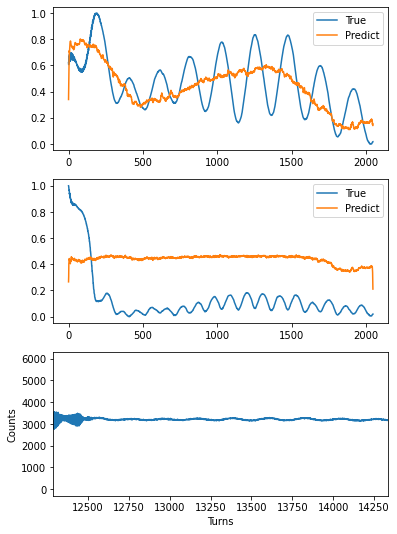

5.352351


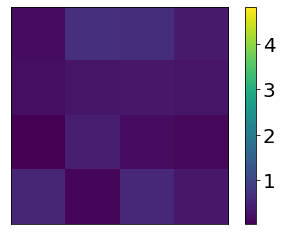

index: 252359
Error: 0.08178776799749894
type                                                         Inst
fill                                                         6274
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 18:44:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6274/...
n_bunches                                                     172
bunch_index                                                   273
bunch_number                                                  140
ts_length                                                   65536
chunk                                                           5
Name: 1288, dtype: object


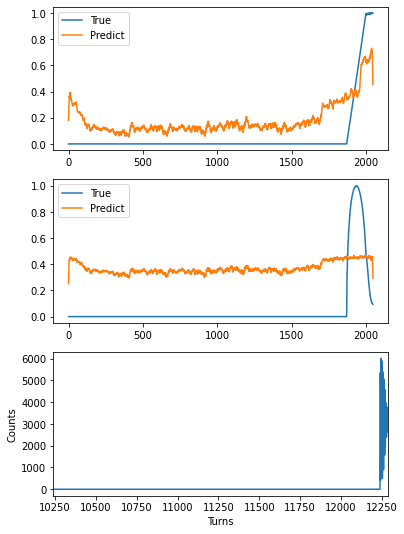

10.700532


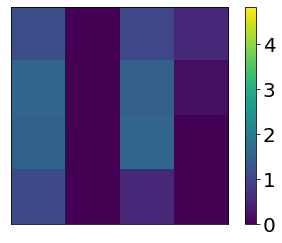

index: 135191
Error: 0.08175445475379567
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                           6
Name: 1698, dtype: object


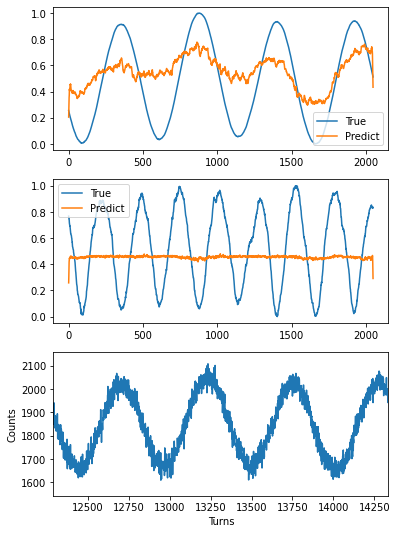

8.101889


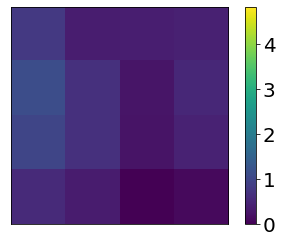

index: 377385
Error: 0.0815496181593803
type                                                         Inst
fill                                                         6246
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-27 04:40:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6246/...
n_bunches                                                     180
bunch_index                                                   228
bunch_number                                                  115
ts_length                                                   65536
chunk                                                           3
Name: 842, dtype: object


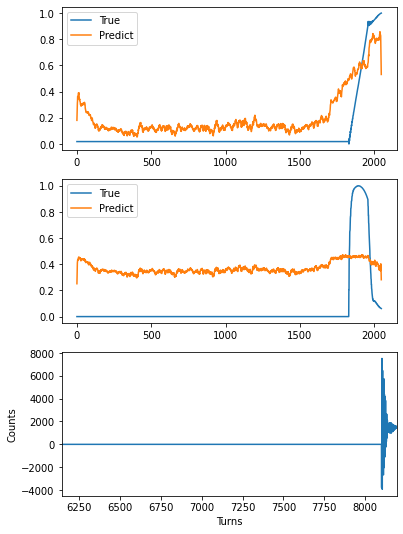

10.531976


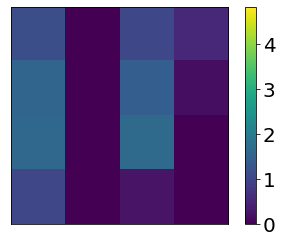

index: 218412
Error: 0.08154372541606685
type                                                         Inst
fill                                                         6805
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-16 02:04:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6805/...
n_bunches                                                     588
bunch_index                                                  1735
bunch_number                                                  464
ts_length                                                   65536
chunk                                                           9
Name: 2449, dtype: object


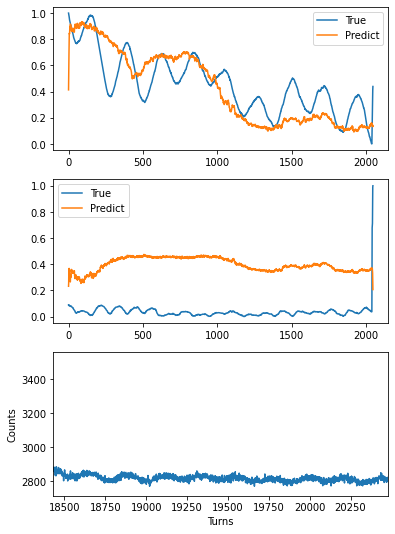

8.4848385


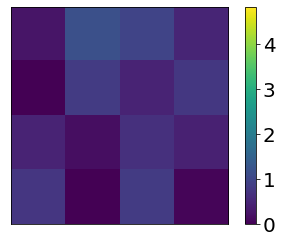

index: 168369
Error: 0.0813478405256727
type                                                         Inst
fill                                                         7091
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-27 01:03:00
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7091/...
n_bunches                                                    1068
bunch_index                                                   576
bunch_number                                                  399
ts_length                                                   65536
chunk                                                          10
Name: 2572, dtype: object


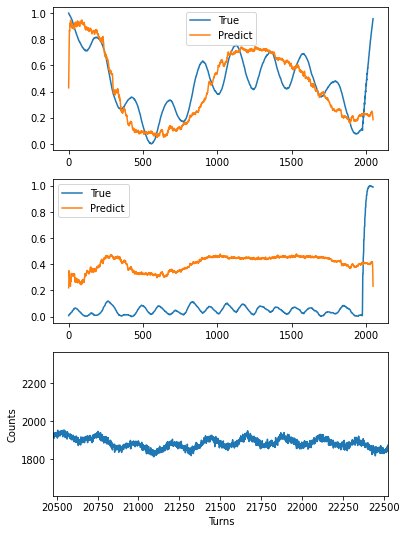

8.740536


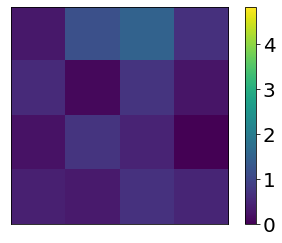

index: 105872
Error: 0.0811288048350307
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-06 02:19:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                     780
bunch_index                                                  1422
bunch_number                                                  775
ts_length                                                   65536
chunk                                                           5
Name: 1378, dtype: object


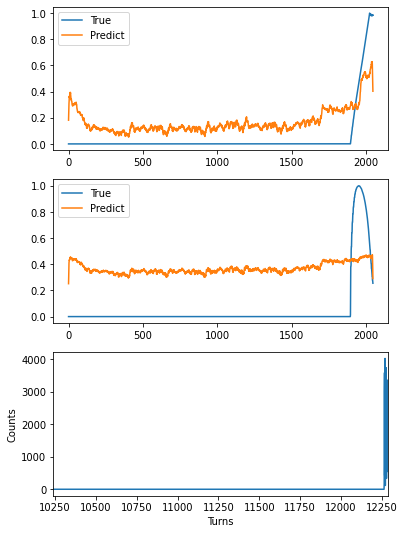

10.771997


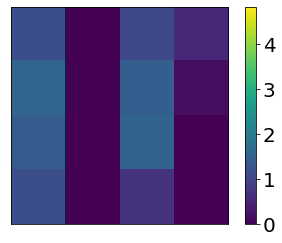

index: 151904
Error: 0.08110826465995737
type                                                         Inst
fill                                                         6399
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-20 12:22:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6399/...
n_bunches                                                     268
bunch_index                                                   477
bunch_number                                                  230
ts_length                                                   65536
chunk                                                           5
Name: 1468, dtype: object


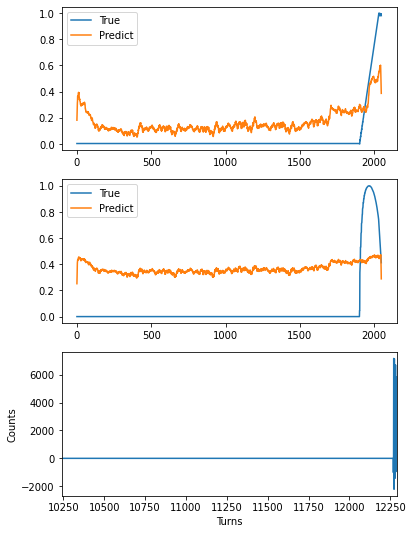

10.7527895


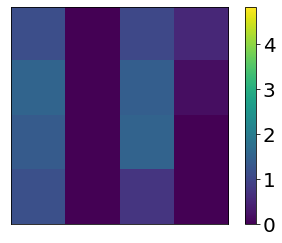

index: 115203
Error: 0.08103209233917073
type                                                         Inst
fill                                                         6255
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-29 22:26:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...
n_bunches                                                    1916
bunch_index                                                  1841
bunch_number                                                 1010
ts_length                                                   65536
chunk                                                           7
Name: 1942, dtype: object


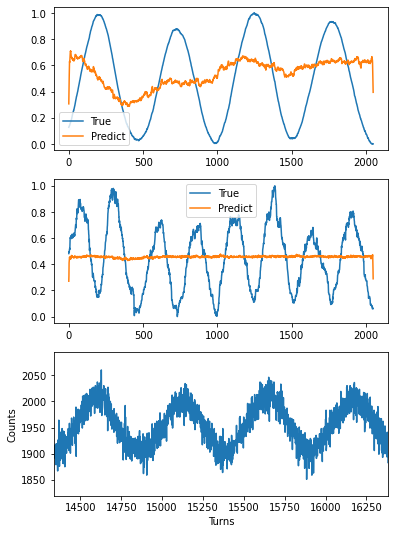

8.01355


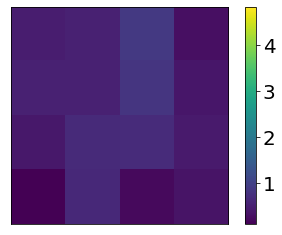

index: 47682
Error: 0.08072896976405043
type                                                         Inst
fill                                                         6255
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-29 21:56:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...
n_bunches                                                    1916
bunch_index                                                  1591
bunch_number                                                  881
ts_length                                                   65536
chunk                                                          15
Name: 3869, dtype: object


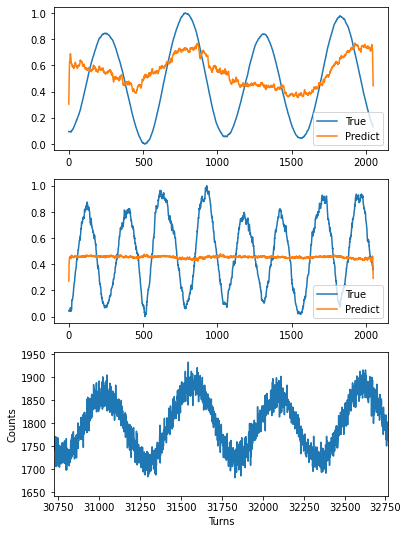

8.154921


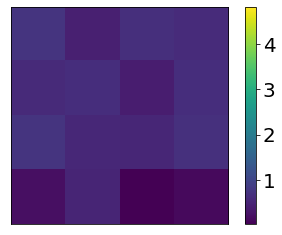

index: 6186
Error: 0.0801714200486166
type                                                         Inst
fill                                                         6744
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-31 03:33:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6744/...
n_bunches                                                     396
bunch_index                                                    98
bunch_number                                                   30
ts_length                                                   65536
chunk                                                          17
Name: 4535, dtype: object


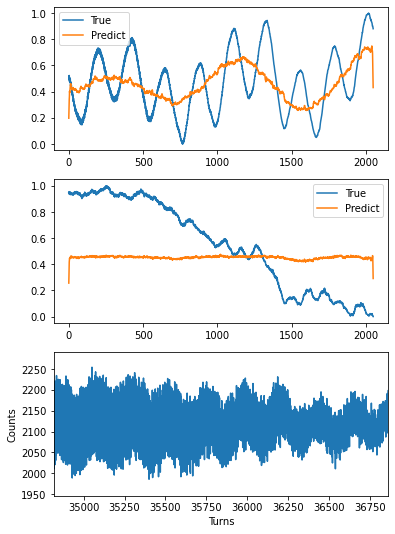

4.6713324


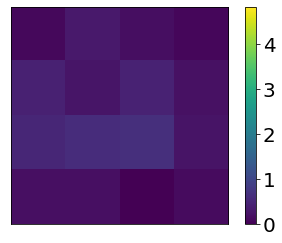

index: 336382
Error: 0.08004998711263886
type                                                         Inst
fill                                                         7361
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 15:07:45
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7361/...
n_bunches                                                     180
bunch_index                                                  1666
bunch_number                                                  110
ts_length                                                   65536
chunk                                                           8
Name: 2140, dtype: object


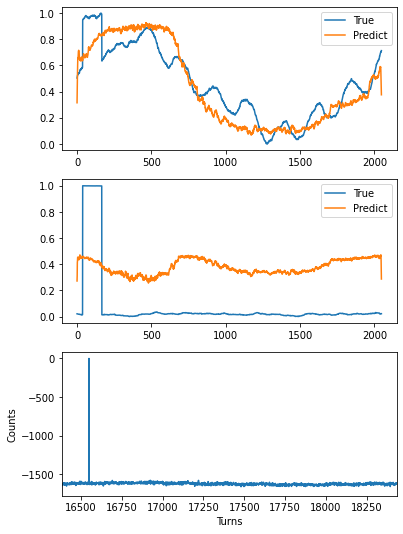

9.577349


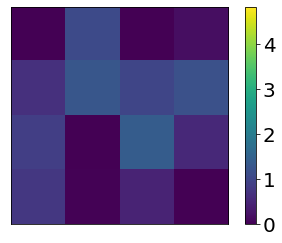

In [116]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [28]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 349702
Error: 0.021776097671433597
type                                                         Inst
fill                                                         6688
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 23:33:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6688/...
n_bunches                                                     987
bunch_index                                                  2931
bunch_number                                                  813
ts_length                                                   65536
chunk                                                          14
Name: 3590, dtype: object


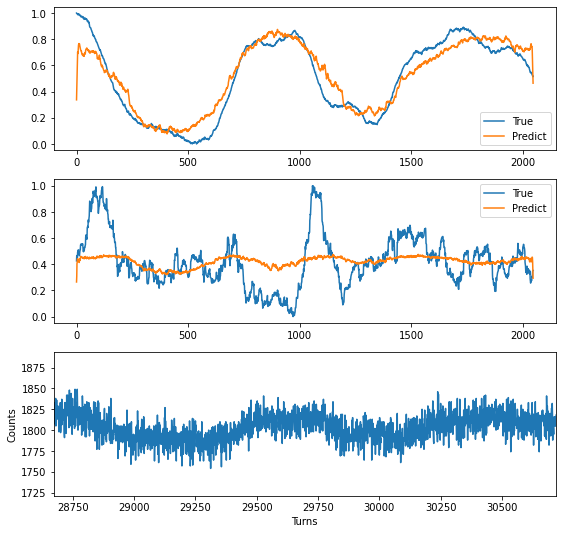

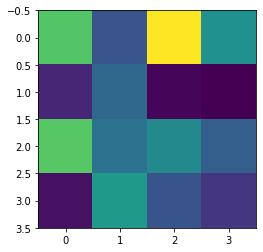

index: 300312
Error: 0.021776046716316565
type                                                         Inst
fill                                                         6759
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-05 03:27:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6759/...
n_bunches                                                    2556
bunch_index                                                   428
bunch_number                                                  277
ts_length                                                   65536
chunk                                                          10
Name: 2599, dtype: object


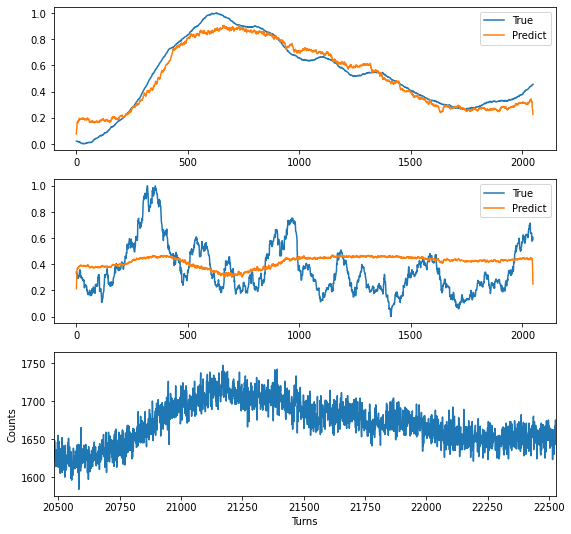

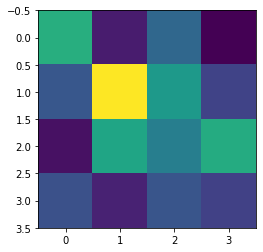

index: 226726
Error: 0.021775958043770447
type                                                         Inst
fill                                                         6283
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 07:35:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6283/...
n_bunches                                                    1868
bunch_index                                                  1973
bunch_number                                                 1054
ts_length                                                   65536
chunk                                                           7
Name: 1994, dtype: object


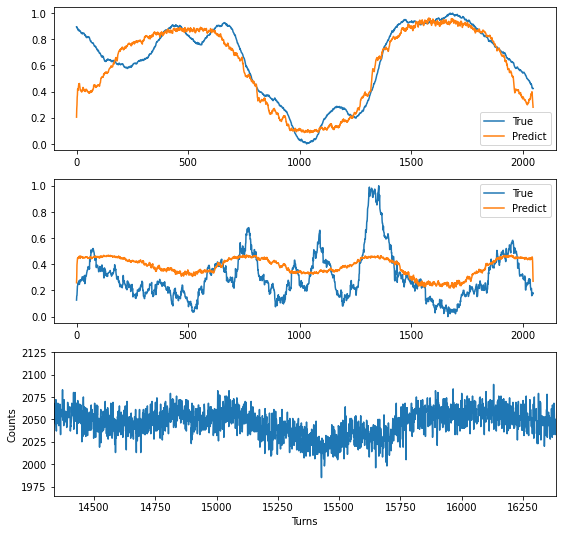

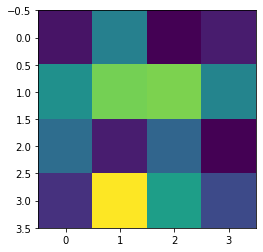

index: 97125
Error: 0.02177633204283174
type                                                         Inst
fill                                                         6860
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-28 17:42:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6860/...
n_bunches                                                    2460
bunch_index                                                  2502
bunch_number                                                 1857
ts_length                                                   65536
chunk                                                          30
Name: 7715, dtype: object


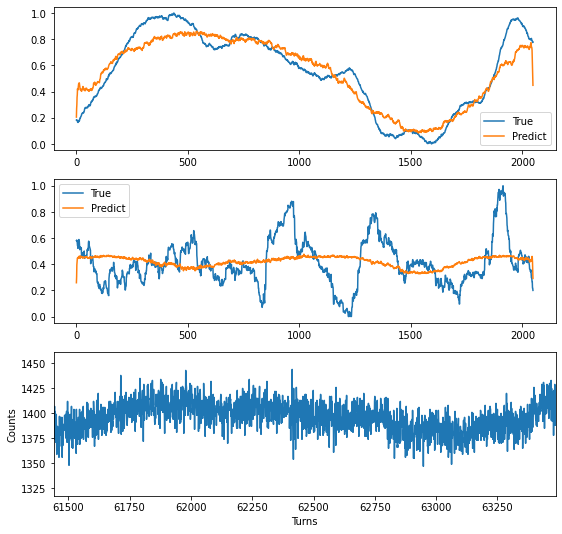

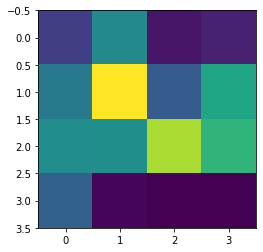

index: 132302
Error: 0.021776369611968202
type                                                         Inst
fill                                                         6189
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-11 07:18:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6189/...
n_bunches                                                    1916
bunch_index                                                  1030
bunch_number                                                  566
ts_length                                                   65536
chunk                                                          15
Name: 4073, dtype: object


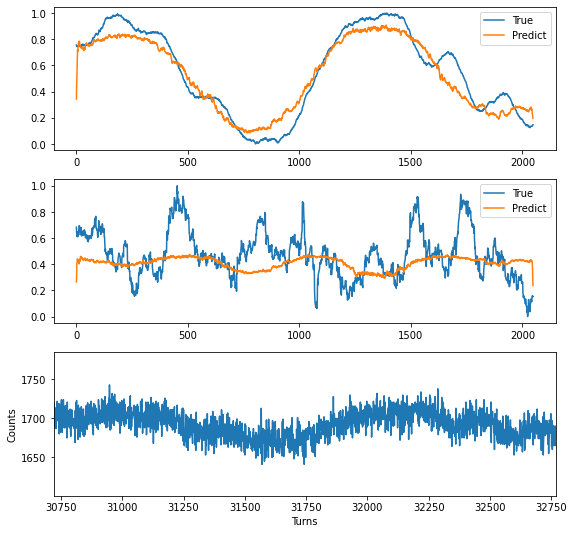

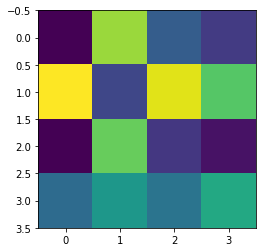

index: 265026
Error: 0.021776410307556004
type                                                         Inst
fill                                                         7058
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-17 16:20:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7058/...
n_bunches                                                    2556
bunch_index                                                   975
bunch_number                                                  704
ts_length                                                   65536
chunk                                                           3
Name: 791, dtype: object


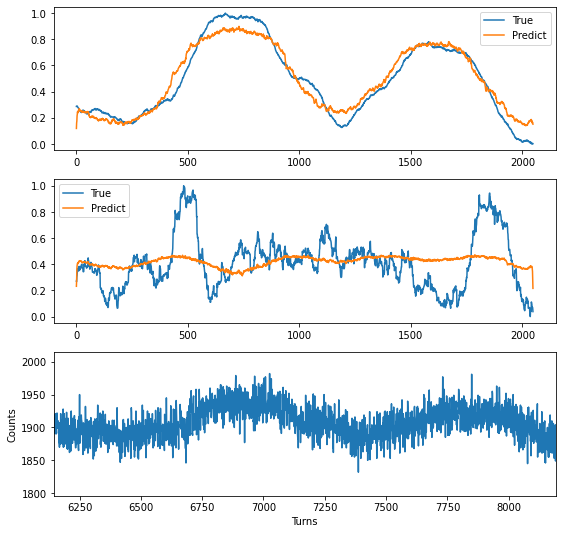

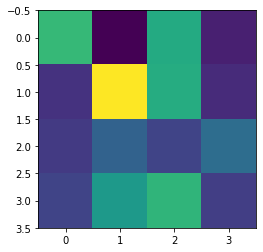

index: 296001
Error: 0.02177641966313512
type                                                         Inst
fill                                                         7033
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-07 11:47:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7033/...
n_bunches                                                    2556
bunch_index                                                   406
bunch_number                                                  274
ts_length                                                   65536
chunk                                                          28
Name: 7258, dtype: object


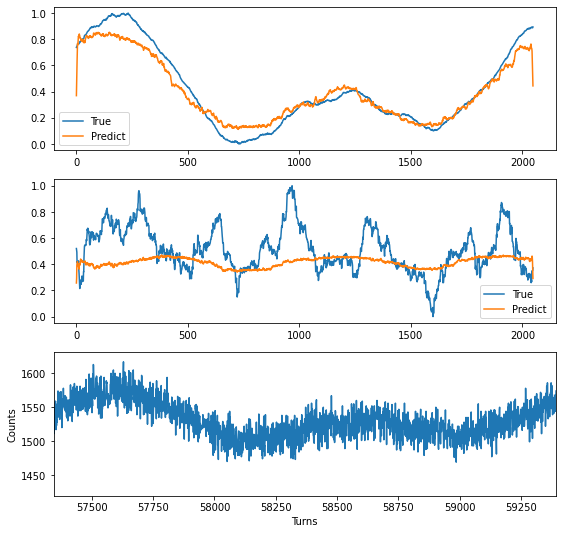

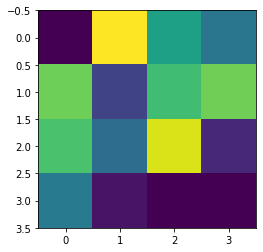

index: 221222
Error: 0.021775802045015148
type                                                         Inst
fill                                                         6789
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-13 23:49:24
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6789/...
n_bunches                                                     780
bunch_index                                                   315
bunch_number                                                  214
ts_length                                                   65536
chunk                                                          27
Name: 7114, dtype: object


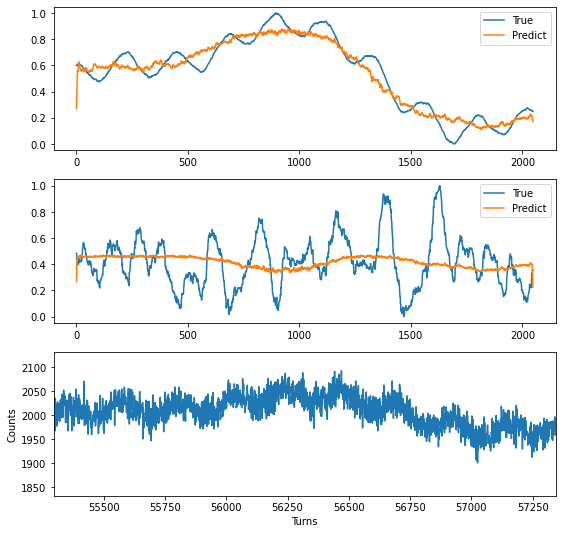

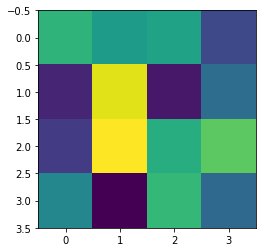

index: 105103
Error: 0.021775789721442316
type                                                         Inst
fill                                                         6923
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-14 22:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6923/...
n_bunches                                                    2556
bunch_index                                                  2729
bunch_number                                                 2021
ts_length                                                   65536
chunk                                                          16
Name: 4273, dtype: object


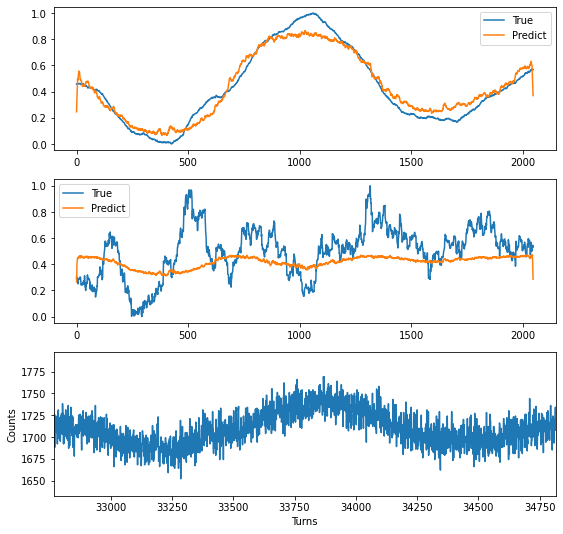

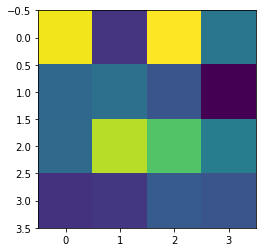

index: 298592
Error: 0.021775785455670736
type                                                         Inst
fill                                                         6696
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-18 06:47:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6696/...
n_bunches                                                    2556
bunch_index                                                  2476
bunch_number                                                 1829
ts_length                                                   65536
chunk                                                           8
Name: 2281, dtype: object


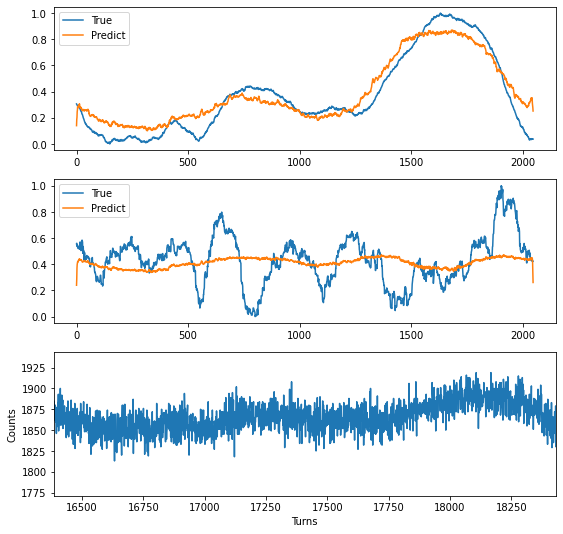

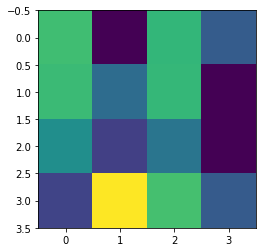

In [29]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [ ]:
# point = 

In [ ]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [ ]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [127]:
indices = sorted_error_indices[-np.arange(1, 64+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
try:
    encoded = checker.encode(encoding_true)
except:
    encoded = np.array(checker.encoder(encoding_true)).squeeze()
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [32]:
from pyobsbox.models import make_conv_ae_2

ae_2 = make_conv_ae_2(2048, 2, **{
        "encoder_sizes": [64, 32, 16, 8, 4],
        "encoder_strides": [4, 4, 4, 4, 2],
        "encoder_dropout": 0.2,
        "decoder_sizes": None,
        "decoder_strides": None,
        "decoder_dropout": None,
    })

In [33]:
ae_2.compile()
ae_2.compile(loss="mse", optimizer="adam")
# ae_2.
train_kwargs = {
    "steps_per_epoch": 10,
    "validation_steps": 4,
    "epochs": 50,
    # "use_multiprocessing": True,
    # "workers": 10,
    # "use_multiprocessing": False,
    # "workers": 1,
}
ae_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           704       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           10272     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            2576      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              6

In [53]:
ae_2 = keras.models.load_model('ae_2')

In [54]:
ae_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 512, 64)           704       
_________________________________________________________________
dropout_8 (Dropout)          (None, 512, 64)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 128, 32)           10272     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 32, 16)            2576      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 16)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 8, 8)             

In [34]:
# hist = ae_2.fit(x=encoding_true, y=encoding_true, **train_kwargs)

Epoch 1/50
10/10 [==============================] - 0s 10ms/step - loss: 0.2456
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1795
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1152
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1136
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1041
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0985
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0939
Epoch 8/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0903
Epoch 9/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0857
Epoch 10/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0872
Epoch 11/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0843
Epoch 12/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0832
Epoch 13/50
10/10 [=============================

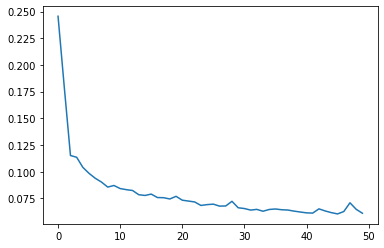

In [37]:
plt.plot(hist.history['loss'])

In [55]:
import keras
layer_names = [layer.name for layer in ae_2.layers]
# layer just before first decoder layer
encoder_layer = ae_2.layers[layer_names.index("conv1d_transpose_10") - 1]
ae_2_encoder = keras.Model(ae_2.input, outputs=encoder_layer.output)

In [56]:
ae_2_encoder.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2048, 2)]         0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 512, 64)           704       
_________________________________________________________________
dropout_8 (Dropout)          (None, 512, 64)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 128, 32)           10272     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 32, 16)            2576      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 16)           

In [128]:
encoded = np.array(ae_2_encoder(encoding_true)).squeeze()
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [58]:
encoding_meta.iloc[0]

type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          20
Name: 5282, dtype: object

In [59]:
encoding_meta.iloc[2]

type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2544
bunch_number                                                 1383
ts_length                                                   65536
chunk                                                          14
Name: 3746, dtype: object

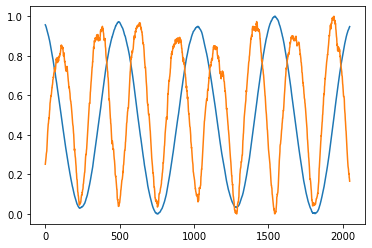

In [60]:
plt.plot(encoding_true[0])

4.823152
0.0


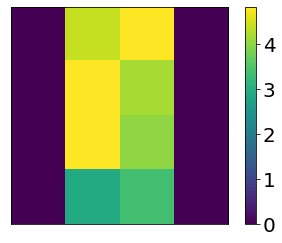

In [112]:
# print(encoded[2].sum())
print(encoded[0].max())
print(encoded[0].min())
plt.imshow(encoded[2], vmax=4.823152)
cbar = plt.colorbar()
plt.xticks([])
plt.yticks([])
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)

4.823152
0.0


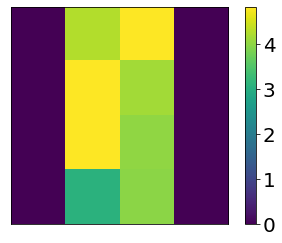

In [113]:
print(encoded[0].max())
print(encoded[0].min())
plt.imshow(encoded[0])
cbar = plt.colorbar()
plt.xticks([])
plt.yticks([])
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)

In [ ]:
scaler = StandardScaler()
encoded_2d_norm = scaler.fit_transform(encoded_2d.T).T

In [ ]:
encoded_2d_norm.shape

In [ ]:
encoded_2d_norm.mean(axis=1)

In [ ]:
encoded_2d.min()

In [ ]:
encoded_2d.max()

In [125]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.5)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.5)
    return fig, axes

def plot_avg_encoding(cluster_indices):
    plt.imshow(encoded[cluster_indices].mean(axis=0))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
encoded_2d_pca = pca.fit_transform(encoded_2d)
plt.scatter(encoded_2d_pca[:, 0], encoded_2d_pca[:, 1], marker='.', s=4)

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
import sklearn
from sklearn.manifold import TSNE

In [ ]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d_pca)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [ ]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

In [117]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib as mpl
mpl.style.use("default")

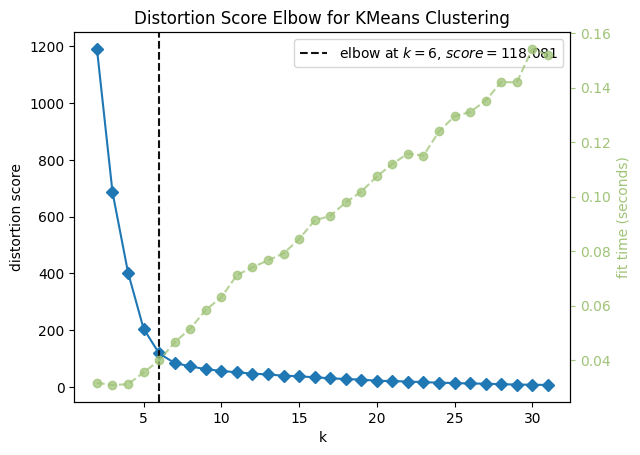

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(2, 32))
viz.fit(encoded_2d)
viz.show()

In [119]:
encoded_2d.shape

(64, 16)

(32, 16)
-------------
n_clusters: 6
cluster 0


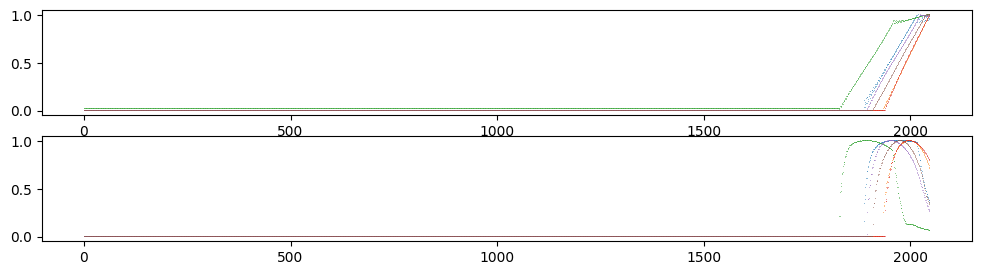

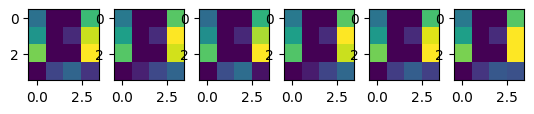

cluster 1


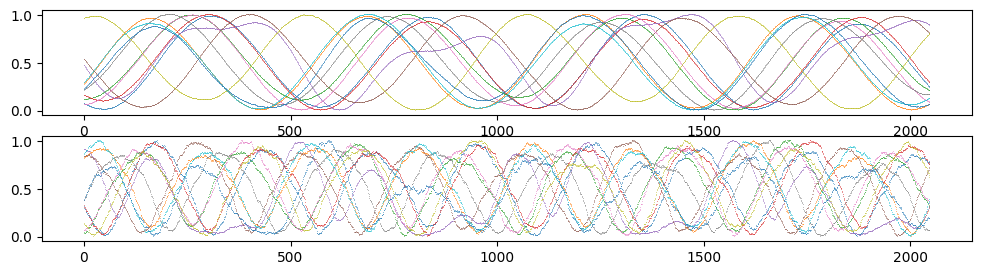

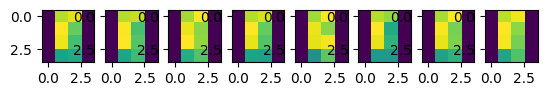

cluster 2


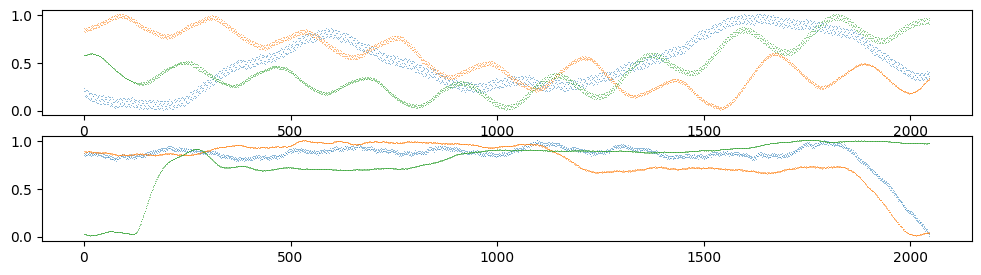

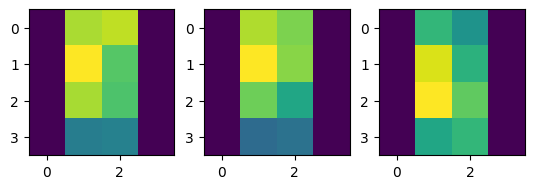

cluster 3


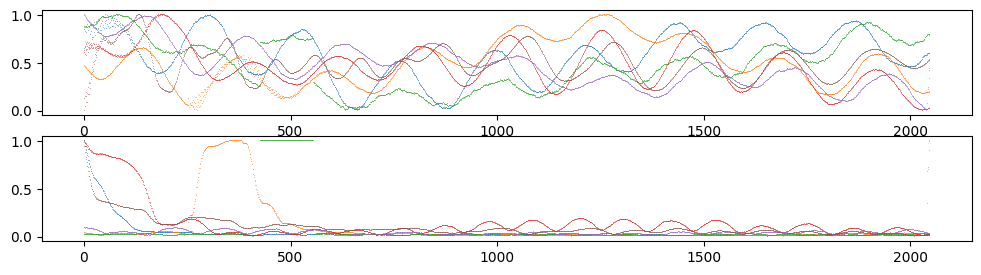

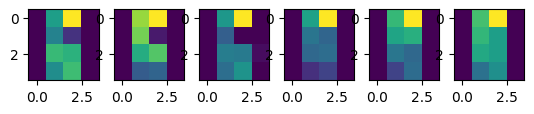

cluster 4


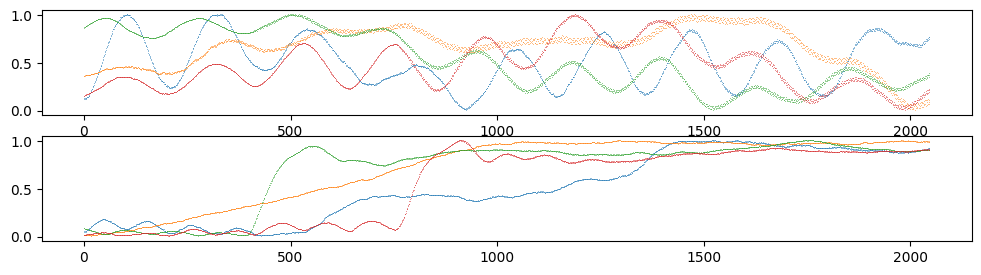

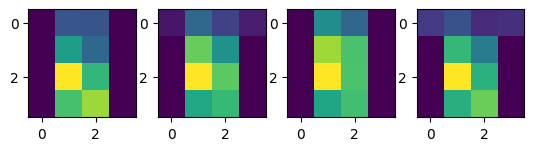

cluster 5


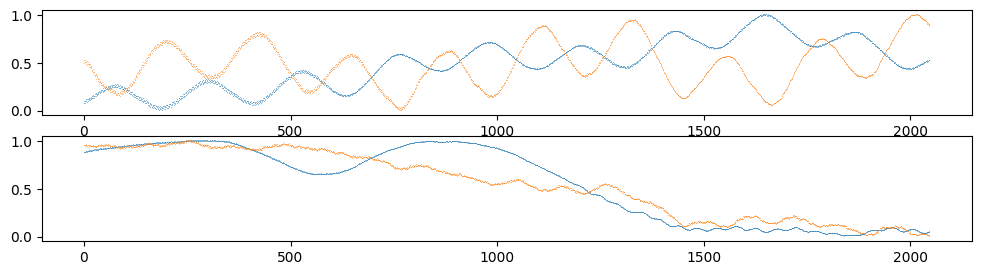

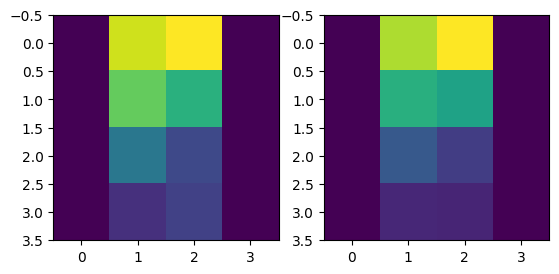

In [130]:
kmeans = KMeans(n_clusters=6)
sub_indices = np.random.choice(np.arange(len(encoded_2d)), size=32, replace=False)

encoded_2d_sub = encoded_2d[sub_indices, :]
encoded_sub = encoded[sub_indices, :]
encoding_true_sub = encoding_true[sub_indices, :]
encoding_meta_sub = encoding_meta.iloc[sub_indices]

print(encoded_2d_sub.shape)
clustering = kmeans.fit(encoded_2d_sub)
print('-------------')
print("n_clusters:", viz.elbow_value_)
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
#     fig, axes = plot_clusters(cluster_indices)
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true_sub[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.5)
    axes[1].plot(encoding_true_sub[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.5)
    plt.show()
    
    n_imgs = min(8, len(cluster_indices))
    fig, axes = plt.subplots(1, n_imgs)
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    for i, img in enumerate(encoded_sub[cluster_indices][:n_imgs]):
        axes[i].imshow(img)
    plt.show()

----------- 0


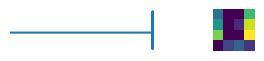

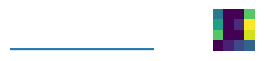

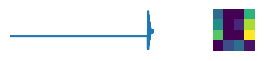

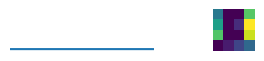

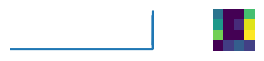

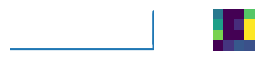

----------- 1


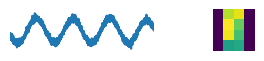

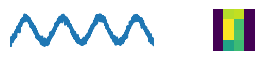

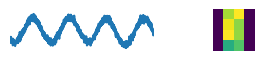

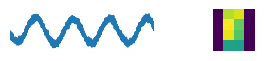

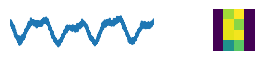

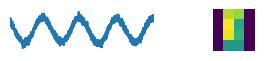

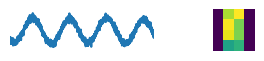

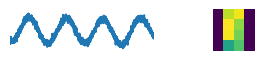

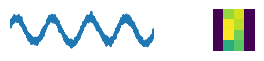

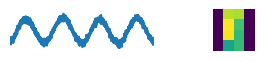

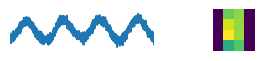

----------- 2


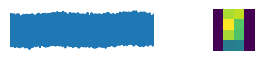

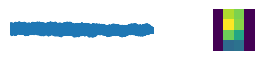

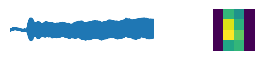

----------- 3


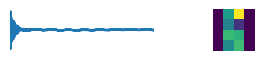

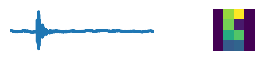

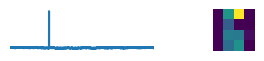

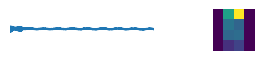

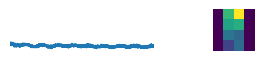

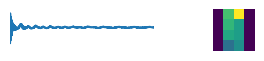

----------- 4


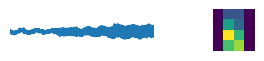

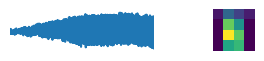

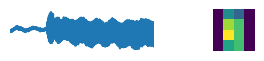

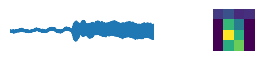

----------- 5


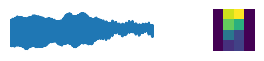

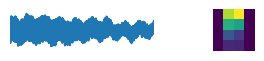

In [131]:
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print('-----------', cluster)
    for i, (_, row) in enumerate(encoding_meta_sub.iloc[cluster_indices].iterrows()):
#         print(row)
        sample_raw_data = checker.load_raw_data(row['file'], row['bunch_index'])
        fig, ax = plt.subplots(1, 2, figsize=(3, 0.5), constrained_layout=True)
        ax[0].plot(sample_raw_data)
        ax[0].set_xticklabels([])
        ax[0].set_yticklabels([])
        ax[0].set_axis_off()
        ax[0].set_xlim(
            [
                (row["chunk"])
                * checker.model_metadata["generator"]["sequence_length"],
                (row["chunk"] + 1)
                * checker.model_metadata["generator"]["sequence_length"],
            ]
        )
#         ax.axvline(
#             row["chunk"] * checker.model_metadata["generator"]["sequence_length"]
#         )
#         ax.axvline(
#             (row["chunk"] + 1)
#             * checker.model_metadata["generator"]["sequence_length"]
#         )
#         print(cluster_indices[i])
        ax[1].imshow(encoded_sub[cluster_indices[i]])
        ax[1].set_axis_off()
        ax[1].set_xticklabels([])
        ax[1].set_yticklabels([])
#         fig.tight_layout()
#         fig.subplots_adjust(left=0, wspace=0, hspace=0)
#         fig.subplots_adjust(pad=-5.0)
        plt.show()
#         break

In [ ]:
labels = clustering.labels_
encoding_true_no_0 = encoding_true[labels != 0]
encoding_pred_no_0 = encoding_pred[labels != 0]
encoding_meta_no_0 = encoding_meta[labels != 0]
encoded_no_0 = encoded[labels != 0]
encoded_2d_no_0 = encoded_2d[labels != 0]
encoded_2d_norm_no_0 = encoded_2d_norm[labels != 0]

In [ ]:
encoded_2d_norm_no_0.shape

In [ ]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(2, 32))
viz.fit(encoded_2d_norm_no_0)
viz.show()

In [ ]:
kmeans = KMeans(n_clusters=18)
clustering = kmeans.fit(encoded_2d_norm_no_0)
print('-------------')
print("n_clusters:", viz.elbow_value_)
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true_no_0[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.5)
    axes[1].plot(encoding_true_no_0[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.5)
    plt.show()
    
    n_imgs = min(8, len(cluster_indices))
    fig, axes = plt.subplots(1, n_imgs)
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    for i, img in enumerate(encoded_no_0[cluster_indices][:n_imgs]):
        axes[i].imshow(img)
    plt.show()

In [ ]:
encoding_meta_no_0.head()

In [ ]:
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)
    print('-----------', cluster)
    for index, row in encoding_meta_no_0.iloc[cluster_indices[:8]].iterrows():
#         print(row)
        sample_raw_data = checker.load_raw_data(row['file'], row['bunch_index'])
        fig, ax = plt.subplots(1, 1, figsize=(12, 1))
        ax.plot(sample_raw_data)
        ax.set_xlim(
            [
                (row["chunk"] - 1)
                * checker.model_metadata["generator"]["sequence_length"],
                (row["chunk"] + 2)
                * checker.model_metadata["generator"]["sequence_length"],
            ]
        )
        ax.axvline(
            row["chunk"] * checker.model_metadata["generator"]["sequence_length"]
        )
        ax.axvline(
            (row["chunk"] + 1)
            * checker.model_metadata["generator"]["sequence_length"]
        )
        plt.show()
#         break
#     break
#     print(cluster)

# Trying good old DTW

In [ ]:
import fastdtw
import dtaidistance
from sklearn.metrics import pairwise_distances
from dtaidistance import dtw_ndim

In [ ]:
dtw_ndim.distance_matrix(encoding_true, ndim=2, parallel=False, show_progress=True)

In [ ]:
encoding_true.shape

In [ ]:
def calc_distance(x1, x2):
    distance, _ = fastdtw(x1, x2)
    return distance

dists = pairwise_distances(self.ts_data.T,
                           metric=calc_distance,
                           n_jobs=-1)